## GPS Data

In [349]:
import requests, zipfile, io, gzip, glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta

In [350]:
PABH_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/PABH_e.csv')
LWCK_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/LWCK_e.csv')
CHZZ_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/CHZZ_e.csv')
ONAB_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/ONAB_e.csv')
PTSG_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/PTSG_e.csv')
P316_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/P316_e.csv')
TRND_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/TRND_e.csv')
P059_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/P059_e.csv')
P193_e = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_e/P193_e.csv')

### Interested time intervals

In [351]:
#WA
PABH_e_filtered = PABH_e[(PABH_e['T'] > 2015) & (PABH_e['T'] < 2021)]
LWCK_e_filtered = LWCK_e[(LWCK_e['T'] > 2016) & (LWCK_e['T'] < 2021)]  # data missing
#OR
ONAB_e_filtered = ONAB_e[(ONAB_e['T'] > 2009) & (ONAB_e['T'] < 2012)]
CHZZ_e_filtered = CHZZ_e[(CHZZ_e['T'] > 2006) & (CHZZ_e['T'] < 2012)]  # data missing
#CA
PTSG_e_filtered = PTSG_e[(PTSG_e['T'] > 2015) & (PTSG_e['T'] < 2021)]   
P316_e_filtered = P316_e[(P316_e['T'] > 2015) & (P316_e['T'] < 2021)]   
TRND_e_filtered = TRND_e[(TRND_e['T'] > 2015) & (TRND_e['T'] < 2021)]   
P059_e_filtered = P059_e[(P059_e['T'] > 2015) & (P059_e['T'] < 2021)]   
P193_e_filtered = P193_e[(P193_e['T'] > 2015) & (P193_e['T'] < 2020)]  # data missing

### Datetime object

In [352]:
#A function to convert decimal date to datetime
def decimal_to_datetime(decimal_date):
    year = int(decimal_date)
    #Calculate the number of days into the year
    days_into_year = (decimal_date - year) * 365
    #Check for leap year
    leap_year = year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)
    #Leap year
    if leap_year:
        days_into_year += 1
    #Convert the year and days into a datetime object
    date = datetime(year, 1, 1) + timedelta(days=days_into_year)
    return date

In [353]:
# Apply the function to the 'T' column

#WA
PABH_e_filtered['Datetime'] = PABH_e_filtered['T'].apply(decimal_to_datetime).dt.date
LWCK_e_filtered['Datetime'] = LWCK_e_filtered['T'].apply(decimal_to_datetime).dt.date
#OR
ONAB_e_filtered['Datetime'] = ONAB_e_filtered['T'].apply(decimal_to_datetime).dt.date
CHZZ_e_filtered['Datetime'] = CHZZ_e_filtered['T'].apply(decimal_to_datetime).dt.date
#CA
PTSG_e_filtered['Datetime'] = PTSG_e_filtered['T'].apply(decimal_to_datetime).dt.date
P316_e_filtered['Datetime'] = P316_e_filtered['T'].apply(decimal_to_datetime).dt.date
TRND_e_filtered['Datetime'] = TRND_e_filtered['T'].apply(decimal_to_datetime).dt.date
P059_e_filtered['Datetime'] = P059_e_filtered['T'].apply(decimal_to_datetime).dt.date
P193_e_filtered['Datetime'] = P193_e_filtered['T'].apply(decimal_to_datetime).dt.date

/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_31414/3141471690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PABH_e_filtered['Datetime'] = PABH_e_filtered['T'].apply(decimal_to_datetime).dt.date
/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_31414/3141471690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LWCK_e_filtered['Datetime'] = LWCK_e_filtered['T'].apply(decimal_to_datetime).dt.date
/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_31414/3141471690.py:7: Se

In [354]:
# Apply Index

#WA
PABH_e_filtered.set_index('Datetime', inplace=True)
LWCK_e_filtered.set_index('Datetime', inplace=True)
#OR
ONAB_e_filtered.set_index('Datetime', inplace=True)
CHZZ_e_filtered.set_index('Datetime', inplace=True)
#CA
PTSG_e_filtered.set_index('Datetime', inplace=True)
P316_e_filtered.set_index('Datetime', inplace=True)
TRND_e_filtered.set_index('Datetime', inplace=True)
P059_e_filtered.set_index('Datetime', inplace=True)
P193_e_filtered.set_index('Datetime', inplace=True)


## GPS and NOAA stations

In [464]:
GPS = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/GPS_station.csv')
NOAA = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_station.csv')

In [465]:
GPS

,Station,Lat,Long
0,CHZZ,45.48652,-123.97812
1,ONAB,44.51452,-124.07451
2,LWCK,46.27813,-124.05384
3,PABH,47.21280,-124.20458
4,PTSG,41.78274,-124.2552
5,TRND,41.05389,-124.15087
6,P059,38.92835,-123.7262
7,P193,38.12294,-122.90815


In [466]:
NOAA

,State,ID,Name,Lat,Long
0,CA,9415020,Point Reyes,37.995,-122.973333
1,CA,9416841,Arena Cove,38.915,-123.711667
2,CA,9418767,North Spit,40.766667,-124.216667
3,CA,9419750,Crescent City,41.745,-124.185
4,OR,9435380,South Beach,44.625,-124.045
5,OR,9437540,Garibaldi,45.555,-123.918333
6,WA,9441102,Westport,46.905,-124.105
7,WA,9440581,Cape Disappointment,46.281667,-124.046667


In [ ]:
fig = px.scatter_geo(NOAA,
                     lat='Lat',lon='Long', 
                     height=600, width=600,
                     hover_name='Name',
                     hover_data=['State','ID']);
fig.update_geos(resolution=110, showcountries=True,showland=True,showcoastlines=True,
               lonaxis=dict(range=[-130, -115], gridwidth=1, dtick=2, showgrid=True),
               lataxis=dict(range=[32, 50], gridwidth=1, dtick=2, showgrid=True))

In [467]:
from itertools import chain

def draw_map (m, scale=0.2):
    #draw a shaded-relief image
    m.shadedrelief(scale=scale)

    #lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90,90,13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    #keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    #cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='black')

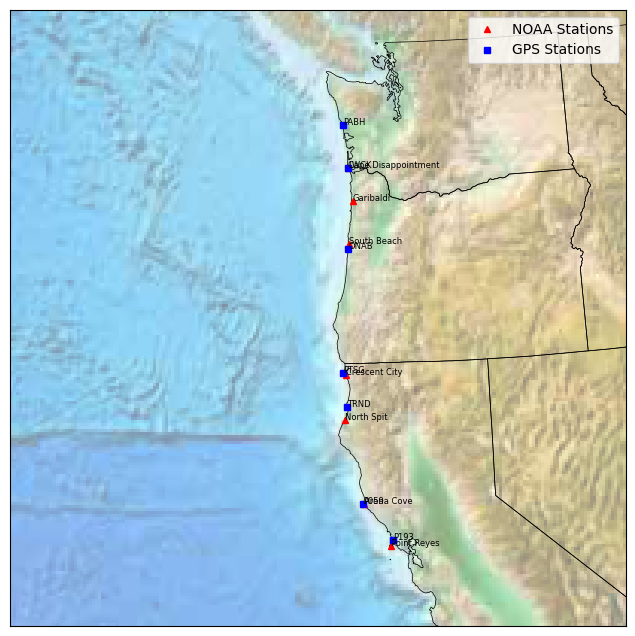

In [471]:
# Clean 'Long' column in NOAA and GPS dataset
NOAA['Long'] = NOAA['Long'].replace('\u200b\u200b', '', regex=True)
NOAA['Long'] = pd.to_numeric(NOAA['Long'], errors='coerce')

GPS['Long'] = GPS['Long'].replace('\u200b\u200b', '', regex=True)
GPS['Long'] = pd.to_numeric(GPS['Long'], errors='coerce')

GPS['Long'] = GPS['Long'].replace('\u200b\u200b', '', regex=True)
GPS['Long'] = pd.to_numeric(GPS['Long'], errors='coerce')


# Drop rows with NaN values in Long or Lat
NOAA = NOAA.dropna(subset=['Long', 'Lat']) 
GPS = GPS.dropna(subset=['Long', 'Lat'])
GPS_curated = GPS.dropna(subset=['Long', 'Lat'])

# Extract latitude and longitude
Lat_NOAA = NOAA['Lat']
Long_NOAA = NOAA['Long']
Lat_GPS = GPS['Lat']
Long_GPS = GPS['Long']
Lat_GPS_curated = GPS['Lat']
Long_GPS_curated = GPS['Long']
Name_NOAA = NOAA['Name']
Name_GPS = GPS['Station']
Name_GPS_curated = GPS['Station']

fig = plt.figure(figsize = (16, 8))
m = Basemap(projection= 'lcc', resolution = None, 
            width = 1.5E6, height = 1.5E6,
            lat_0 = 43, lon_0 = -125)

#draw_map(m)

# Specify the correct path to the shapefile (replace 'path_to_directory' with the correct path)
shapefile_path = '/Users/suphakornpoobua/Documents/GitHub/Undergraduate-Research-2/'

# Add state boundaries
m.readshapefile(shapefile_path + 'st99_d00', name='states', drawbounds=True)

m.etopo(scale=1, alpha=0.5)

# Map (Long, Lat) to (x, y) for plotting all points at once
X, Y = m(Long_NOAA.values, Lat_NOAA.values)
#A, B = m(Long_GPS.values, Lat_GPS.values)
A, B = m(Long_GPS.values, Lat_GPS.values)

# Plot all points at once
plt.plot(X, Y, '^', markersize=5, color='red', label='NOAA Stations')
plt.plot(A, B, 's', markersize=5, color='blue', label='GPS Stations')

# Add text labels for each point
for x, y, name1 in zip(X, Y, Name_NOAA):
    plt.text(x, y, name1, fontsize=6)

# Add text labels for each point
for a, b, name2 in zip(A, B, Name_GPS):
    plt.text(a, b, name2, fontsize=6)   

plt.legend()
plt.show()

## Water Level Data

### Download data

In [355]:
#Northern Oregon (2008-2009) +- 2 years

#South Beach
#South_Beach_2006 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2006.csv')
#South_Beach_2007 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2007.csv')
#South_Beach_2008 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2008.csv')
South_Beach_2009 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2009.csv')
South_Beach_2010 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2010.csv')
South_Beach_2011 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/South_Beach/South_Beach_2011.csv')

#Garibaldi

Garibaldi_2006 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2006.csv')
Garibaldi_2007 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2007.csv')
Garibaldi_2008 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2008.csv')
Garibaldi_2009 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2009.csv')
Garibaldi_2010 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2010.csv')
Garibaldi_2011 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Garibaldi/Garibaldi_2011.csv')

#Astoria

Astoria_2006 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2006.csv')
Astoria_2007 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2007.csv')
Astoria_2008 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2008.csv')
Astoria_2009 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2009.csv')
Astoria_2010 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2010.csv')
Astoria_2011 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/OR/Astoria/Astoria_2011.csv')

#-----------------------------------------------#

#Southern Washington (2017-2018) +- 2 years

#Toke Point

# Toke_Point_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2015.csv')
# Toke_Point_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2016.csv')
# Toke_Point_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2017.csv')
# Toke_Point_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2018.csv')
# Toke_Point_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2019.csv')
# Toke_Point_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Toke_Point/Toke_Point_2020.csv')

#Westport

Westport_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2015.csv')
Westport_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2016.csv')
Westport_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2017.csv')
Westport_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2018.csv')
Westport_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2019.csv')
Westport_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Westport/Westport_2020.csv')

#Cape Disappointment

Cape_Disappointment_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2015.csv')
Cape_Disappointment_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2016.csv')
Cape_Disappointment_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2017.csv')
Cape_Disappointment_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2018.csv')
Cape_Disappointment_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2019.csv')
Cape_Disappointment_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/WA/Cape_Disappointment/Cape_Disappointment_2020.csv')

#-----------------------------------------------#

#Northern California (2017-2018) +- 2 years

#Crescent City

Crescent_City_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2015.csv')
Crescent_City_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2016.csv')
Crescent_City_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2017.csv')
Crescent_City_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2018.csv')
Crescent_City_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2019.csv')
Crescent_City_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Crescent_City/Crescent_City_2020.csv')

#North Spit

North_Spit_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2015.csv')
North_Spit_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2016.csv')
North_Spit_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2017.csv')
North_Spit_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2018.csv')
North_Spit_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2019.csv')
North_Spit_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/North_Spit/North_Spit_2020.csv')

#Arena Cove 

Arena_Cove_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2015.csv')
Arena_Cove_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2016.csv')
Arena_Cove_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2017.csv')
Arena_Cove_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2018.csv')
Arena_Cove_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2019.csv')
Arena_Cove_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Arena_Cove/Arena_Cove_2020.csv')

#Point Reyes

Point_Reyes_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2015.csv')
Point_Reyes_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2016.csv')
Point_Reyes_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2017.csv')
Point_Reyes_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2018.csv')
Point_Reyes_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2019.csv')
#Point_Reyes_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Point_Reyes/Point_Reyes_2020.csv')

#Monterey

Monterey_2015 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2015.csv')
Monterey_2016 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2016.csv')
Monterey_2017 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2017.csv')
Monterey_2018 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2018.csv')
Monterey_2019 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2019.csv')
Monterey_2020 = pd.read_csv('https://raw.githubusercontent.com/Benz-Poobua/Undergraduate-Research-2/main/NOAA_WL/CA/Monterey/Monterey_2020.csv')

In [356]:
#Concatenate the DataFrames

#Northern Oregon (2006-2011)
South_Beach_2006_2011 = pd.concat([South_Beach_2009, South_Beach_2010, South_Beach_2011], ignore_index=True)
Garibaldi_2006_2011 = pd.concat([Garibaldi_2006, Garibaldi_2007, Garibaldi_2008, Garibaldi_2009, Garibaldi_2010, Garibaldi_2011], ignore_index=True)
Astoria_2006_2011 = pd.concat([Astoria_2006, Astoria_2007, Astoria_2008, Astoria_2009, Astoria_2010, Astoria_2011], ignore_index=True)

#Southern Washington (2015-2020)
#Toke_Point_2015_2020 = pd.concat([Toke_Point_2017, Toke_Point_2018, Toke_Point_2019, Toke_Point_2020], ignore_index=True)
Westport_2015_2020 = pd.concat([Westport_2015, Westport_2016, Westport_2017, Westport_2018, Westport_2019, Westport_2020], ignore_index=True)
Cape_Disappointment_2015_2020 = pd.concat([Cape_Disappointment_2016, Cape_Disappointment_2017, Cape_Disappointment_2018, Cape_Disappointment_2019, Cape_Disappointment_2020], ignore_index=True)

#Northern California (2015-2020)
Crescent_City_2015_2020 = pd.concat([Crescent_City_2015, Crescent_City_2016, Crescent_City_2017, Crescent_City_2018, Crescent_City_2019, Crescent_City_2020], ignore_index=True)
North_Spit_2015_2020 = pd.concat([North_Spit_2015, North_Spit_2016, North_Spit_2017, North_Spit_2018, North_Spit_2019, North_Spit_2020], ignore_index=True)
Arena_Cove_2015_2020 = pd.concat([Arena_Cove_2015, Arena_Cove_2016, Arena_Cove_2017, Arena_Cove_2018, Arena_Cove_2019, Arena_Cove_2020], ignore_index=True)
Point_Reyes_2015_2020 = pd.concat([Point_Reyes_2015, Point_Reyes_2016, Point_Reyes_2017, Point_Reyes_2018, Point_Reyes_2019], ignore_index=True)
Monterey_2015_2020 = pd.concat([Monterey_2015, Monterey_2016, Monterey_2017, Monterey_2018, Monterey_2019, Monterey_2020], ignore_index=True)

In [357]:
#Remove rows containing NaN or '-' in the 'Verified (ft)' column
#Toke_Point_2015_2020 = Toke_Point_2015_2020[(Toke_Point_2015_2020['Verified (ft)'].notna()) & (Toke_Point_2015_2020['Verified (ft)'] != '-')]
Cape_Disappointment_2015_2020 = Cape_Disappointment_2015_2020[(Cape_Disappointment_2015_2020['Verified (ft)'].notna()) & (Cape_Disappointment_2015_2020['Verified (ft)'] != '-')]

#Reset index after dropping rows
#Toke_Point_2015_2020.reset_index(drop=True, inplace=True)
Cape_Disappointment_2015_2020.reset_index(drop=True, inplace=True)

In [358]:
#Combine 'Date' and 'Time (GMT)' into a single column

#Northern Oregon (2006-2011)
South_Beach_2006_2011['Datetime'] = pd.to_datetime(South_Beach_2006_2011['Date'] + ' ' + South_Beach_2006_2011['Time (GMT)'])
Garibaldi_2006_2011['Datetime'] = pd.to_datetime(Garibaldi_2006_2011['Date'] + ' ' + Garibaldi_2006_2011['Time (GMT)'])
Astoria_2006_2011['Datetime'] = pd.to_datetime(Astoria_2006_2011['Date'] + ' ' + Astoria_2006_2011['Time (GMT)'])

#Southern Washington (2015-2020)
#Toke_Point_2015_2020['Datetime'] = pd.to_datetime(Toke_Point_2015_2020['Date'] + ' ' + Toke_Point_2015_2020['Time (GMT)'])
Westport_2015_2020['Datetime'] = pd.to_datetime(Westport_2015_2020['Date'] + ' ' + Westport_2015_2020['Time (GMT)'])
Cape_Disappointment_2015_2020['Datetime'] = pd.to_datetime(Cape_Disappointment_2015_2020['Date'] + ' ' + Cape_Disappointment_2015_2020['Time (GMT)'])

#Northern California (2015-2020)
Crescent_City_2015_2020['Datetime'] = pd.to_datetime(Crescent_City_2015_2020['Date'] + ' ' + Crescent_City_2015_2020['Time (GMT)'])
North_Spit_2015_2020['Datetime'] = pd.to_datetime(North_Spit_2015_2020['Date'] + ' ' + North_Spit_2015_2020['Time (GMT)'])
Arena_Cove_2015_2020['Datetime'] = pd.to_datetime(Arena_Cove_2015_2020['Date'] + ' ' + Arena_Cove_2015_2020['Time (GMT)'])
Point_Reyes_2015_2020['Datetime'] = pd.to_datetime(Point_Reyes_2015_2020['Date'] + ' ' + Point_Reyes_2015_2020['Time (GMT)'])
Monterey_2015_2020['Datetime'] = pd.to_datetime(Monterey_2015_2020['Date'] + ' ' + Monterey_2015_2020['Time (GMT)'])

### Visualize raw data

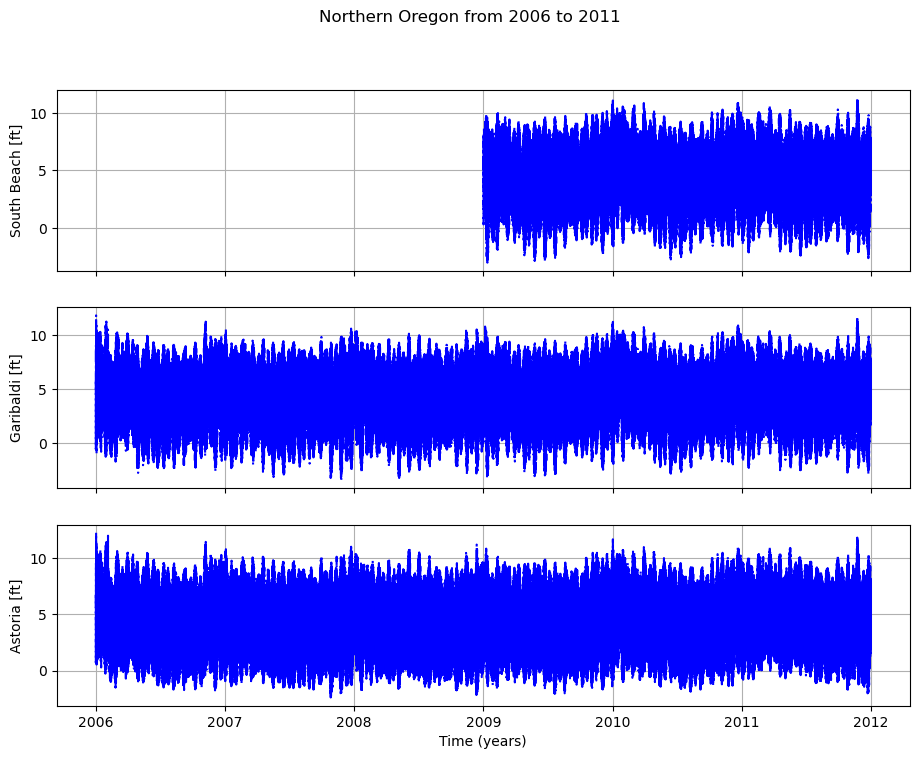

In [363]:
#Northern Oregon (2006-2011)
fig,ax=plt.subplots(3,1,figsize=(11,8),sharex=True)
fig.suptitle('Northern Oregon from 2006 to 2011')
ax[0].plot(South_Beach_2006_2011['Datetime'], South_Beach_2006_2011['Verified (ft)'], '-.b');ax[0].grid(True);ax[0].set_ylabel('South Beach [ft]') 
ax[1].plot(Garibaldi_2006_2011['Datetime'], Garibaldi_2006_2011['Verified (ft)'], '-.b');ax[1].grid(True);ax[1].set_ylabel('Garibaldi [ft]') 
ax[2].plot(Astoria_2006_2011['Datetime'], Astoria_2006_2011['Verified (ft)'], '-.b');ax[2].grid(True);ax[2].set_ylabel('Astoria [ft]') 
ax[2].set_xlabel('Time (years)')
plt.show()

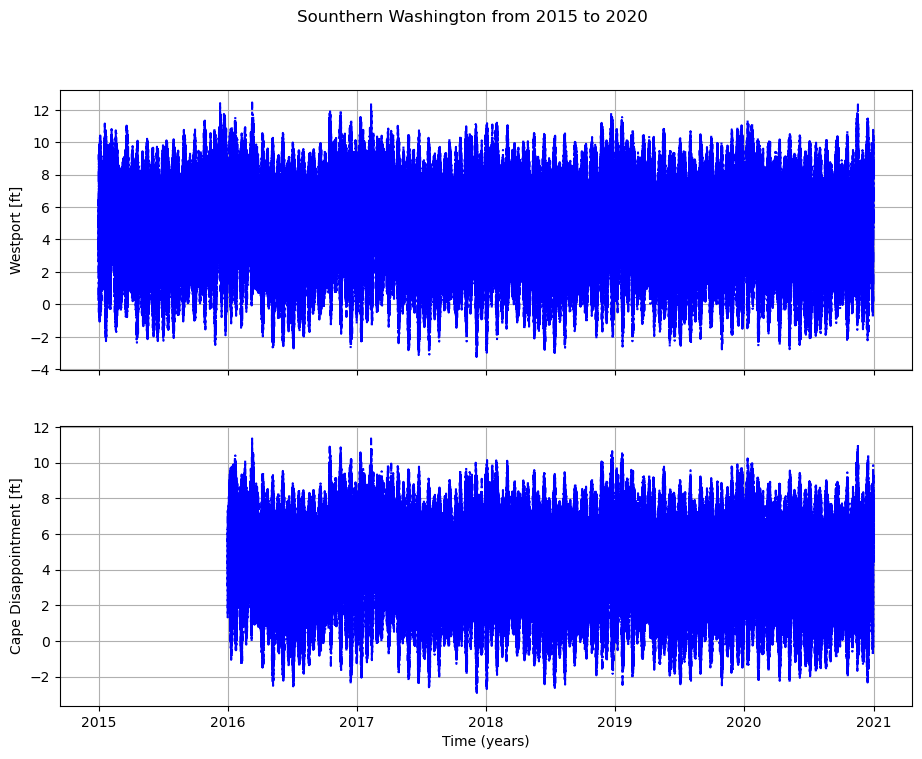

In [362]:
#Southern Washington (2015-2020)
fig,ax=plt.subplots(2,1,figsize=(11,8),sharex=True)
fig.suptitle('Sounthern Washington from 2015 to 2020')
ax[0].plot(Westport_2015_2020['Datetime'], Westport_2015_2020['Verified (ft)'], '-.b');ax[0].grid(True);ax[0].set_ylabel('Westport [ft]') 
ax[1].plot(Cape_Disappointment_2015_2020['Datetime'], Cape_Disappointment_2015_2020['Verified (ft)'], '-.b');ax[1].grid(True);ax[1].set_ylabel('Cape Disappointment [ft]') 
ax[1].set_xlabel('Time (years)')
plt.show()

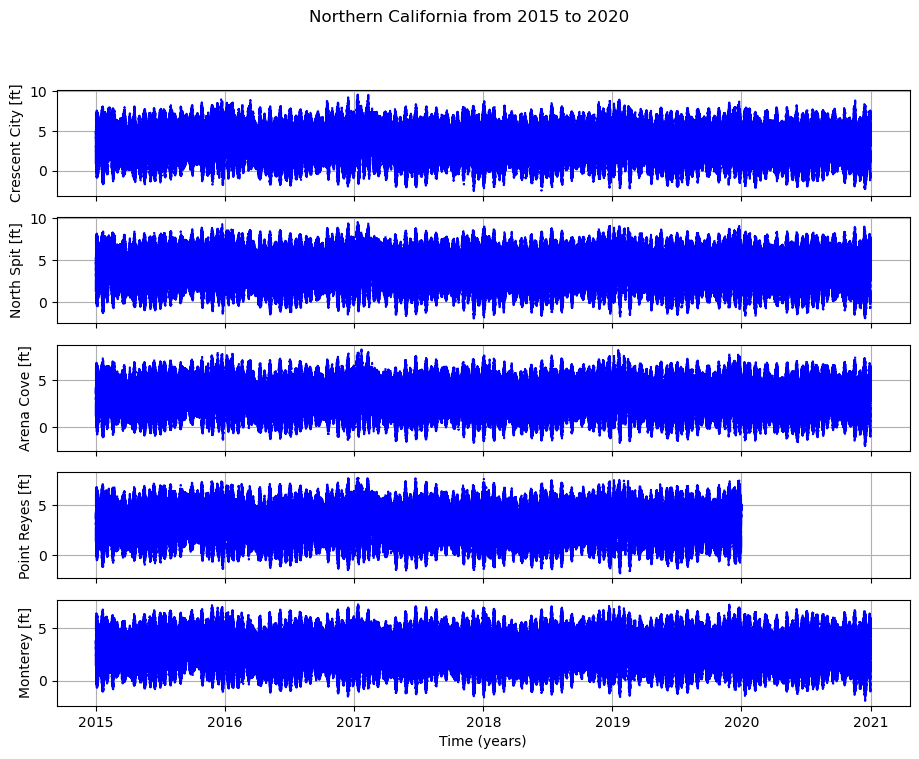

In [361]:
#Northern California (2015-2020)
fig,ax=plt.subplots(5,1,figsize=(11,8),sharex=True)
fig.suptitle('Northern California from 2015 to 2020')
ax[0].plot(Crescent_City_2015_2020['Datetime'], Crescent_City_2015_2020['Verified (ft)'], '-.b');ax[0].grid(True);ax[0].set_ylabel('Crescent City [ft]') 
ax[1].plot(North_Spit_2015_2020['Datetime'], North_Spit_2015_2020['Verified (ft)'], '-.b');ax[1].grid(True);ax[1].set_ylabel('North Spit [ft]') 
ax[2].plot(Arena_Cove_2015_2020['Datetime'], Arena_Cove_2015_2020['Verified (ft)'], '-.b');ax[2].grid(True);ax[2].set_ylabel('Arena Cove [ft]')
ax[3].plot(Point_Reyes_2015_2020['Datetime'], Point_Reyes_2015_2020['Verified (ft)'], '-.b');ax[3].grid(True);ax[3].set_ylabel('Point Reyes [ft]')
ax[4].plot(Monterey_2015_2020['Datetime'], Monterey_2015_2020['Verified (ft)'], '-.b');ax[4].grid(True);ax[4].set_ylabel('Monterey [ft]') 
ax[4].set_xlabel('Time (years)')
plt.show()

In [364]:
#Combine 'Date' and 'Time (GMT)' into a single column

#Northern Oregon (2006-2011)
South_Beach_2006_2011['Datetime'] = pd.to_datetime(South_Beach_2006_2011['Date'] + ' ' + South_Beach_2006_2011['Time (GMT)'])
Garibaldi_2006_2011['Datetime'] = pd.to_datetime(Garibaldi_2006_2011['Date'] + ' ' + Garibaldi_2006_2011['Time (GMT)'])
Astoria_2006_2011['Datetime'] = pd.to_datetime(Astoria_2006_2011['Date'] + ' ' + Astoria_2006_2011['Time (GMT)'])

#Southern Washington (2015-2020)
#Toke_Point_2015_2020['Datetime'] = pd.to_datetime(Toke_Point_2015_2020['Date'] + ' ' + Toke_Point_2015_2020['Time (GMT)'])
Westport_2015_2020['Datetime'] = pd.to_datetime(Westport_2015_2020['Date'] + ' ' + Westport_2015_2020['Time (GMT)'])
Cape_Disappointment_2015_2020['Datetime'] = pd.to_datetime(Cape_Disappointment_2015_2020['Date'] + ' ' + Cape_Disappointment_2015_2020['Time (GMT)'])

#Northern California (2015-2020)
Crescent_City_2015_2020['Datetime'] = pd.to_datetime(Crescent_City_2015_2020['Date'] + ' ' + Crescent_City_2015_2020['Time (GMT)'])
North_Spit_2015_2020['Datetime'] = pd.to_datetime(North_Spit_2015_2020['Date'] + ' ' + North_Spit_2015_2020['Time (GMT)'])
Arena_Cove_2015_2020['Datetime'] = pd.to_datetime(Arena_Cove_2015_2020['Date'] + ' ' + Arena_Cove_2015_2020['Time (GMT)'])
Point_Reyes_2015_2020['Datetime'] = pd.to_datetime(Point_Reyes_2015_2020['Date'] + ' ' + Point_Reyes_2015_2020['Time (GMT)'])
Monterey_2015_2020['Datetime'] = pd.to_datetime(Monterey_2015_2020['Date'] + ' ' + Monterey_2015_2020['Time (GMT)'])

#-----------------------------------------------#

#Convert 'Datetime' column to datetime

#Northern Oregon (2006-2011)
South_Beach_2006_2011['Datetime'] = pd.to_datetime(South_Beach_2006_2011['Datetime'])
Garibaldi_2006_2011['Datetime'] = pd.to_datetime(Garibaldi_2006_2011['Datetime'])
Astoria_2006_2011['Datetime'] = pd.to_datetime(Astoria_2006_2011['Datetime'])

#Southern Washington (2015-2020)
#Toke_Point_2015_2020['Datetime'] = pd.to_datetime(Toke_Point_2015_2020['Datetime'])
Westport_2015_2020['Datetime'] = pd.to_datetime(Westport_2015_2020['Datetime'])
Cape_Disappointment_2015_2020['Datetime'] = pd.to_datetime(Cape_Disappointment_2015_2020['Datetime'])

#Northern California (2015-2020)
Crescent_City_2015_2020['Datetime'] = pd.to_datetime(Crescent_City_2015_2020['Datetime'])
North_Spit_2015_2020['Datetime'] = pd.to_datetime(North_Spit_2015_2020['Datetime'])
Arena_Cove_2015_2020['Datetime'] = pd.to_datetime(Arena_Cove_2015_2020['Datetime'])
Point_Reyes_2015_2020['Datetime'] = pd.to_datetime(Point_Reyes_2015_2020['Datetime'])
Monterey_2015_2020['Datetime'] = pd.to_datetime(Monterey_2015_2020['Datetime'])

#-----------------------------------------------#

#Set 'Datetime' column as the index

#Northern Oregon (2006-2011)
South_Beach_2006_2011.set_index('Datetime', inplace=True)
Garibaldi_2006_2011.set_index('Datetime', inplace=True)
Astoria_2006_2011.set_index('Datetime', inplace=True)

#Southern Washington (2015-2020)
#Toke_Point_2015_2020.set_index('Datetime', inplace=True)
Westport_2015_2020.set_index('Datetime', inplace=True)
Cape_Disappointment_2015_2020.set_index('Datetime', inplace=True)

#Northern California (2015-2020)
Crescent_City_2015_2020.set_index('Datetime', inplace=True)
North_Spit_2015_2020.set_index('Datetime', inplace=True)
Arena_Cove_2015_2020.set_index('Datetime', inplace=True)
Point_Reyes_2015_2020.set_index('Datetime', inplace=True)
Monterey_2015_2020.set_index('Datetime', inplace=True)

#Resample by averaging every 24 values

#Northern Oregon (2006-2011)
South_Beach_2006_2011_resampled = South_Beach_2006_2011.resample('24H').mean()
Garibaldi_2006_2011_resampled = Garibaldi_2006_2011.resample('24H').mean()
Astoria_2006_2011_resampled = Astoria_2006_2011.resample('24H').mean()

#Southern Washington (2015-2020)
#Toke_Point_2015_2020_resampled = Toke_Point_2015_2020.resample('24H').mean()
Westport_2015_2020_resampled = Westport_2015_2020.resample('24H').mean()
Cape_Disappointment_2015_2020_resampled = Cape_Disappointment_2015_2020.resample('24H').mean()

#Northern California (2015-2020)
Crescent_City_2015_2020_resampled = Crescent_City_2015_2020.resample('24H').mean()
North_Spit_2015_2020_resampled = North_Spit_2015_2020.resample('24H').mean()
Arena_Cove_2015_2020_resampled = Arena_Cove_2015_2020.resample('24H').mean()
Point_Reyes_2015_2020_resampled = Point_Reyes_2015_2020.resample('24H').mean()
Monterey_2015_2020_resampled = Monterey_2015_2020.resample('24H').mean()

/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_31414/2984752248.py:65: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  South_Beach_2006_2011_resampled = South_Beach_2006_2011.resample('24H').mean()
/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_31414/2984752248.py:66: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Garibaldi_2006_2011_resampled = Garibaldi_2006_2011.resample('24H').mean()
/var/folders/vn/yw43vwrj3nsglb002nc_3s6w0000gn/T/ipykernel_31414/2984752248.py:67: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_o

In [365]:
# Create a date range from January 1, 2015, to December 31, 2020
date_range = pd.date_range(start='2015-01-01', end='2020-12-31')

# Calculate the fraction of days for each date in the range
fractions_of_days = [(date.dayofyear / (366 if date.is_leap_year else 365)) for date in date_range]

# Combine the dates and their respective fractions into a DataFrame
date_fractions_df = pd.DataFrame({'Date': date_range, 'Fraction_of_Days': fractions_of_days})

print(date_fractions_df)


           Date  Fraction_of_Days
0    2015-01-01          0.002740
1    2015-01-02          0.005479
2    2015-01-03          0.008219
3    2015-01-04          0.010959
4    2015-01-05          0.013699
...         ...               ...
2187 2020-12-27          0.989071
2188 2020-12-28          0.991803
2189 2020-12-29          0.994536
2190 2020-12-30          0.997268
2191 2020-12-31          1.000000

[2192 rows x 2 columns]


### Visualize resampled data

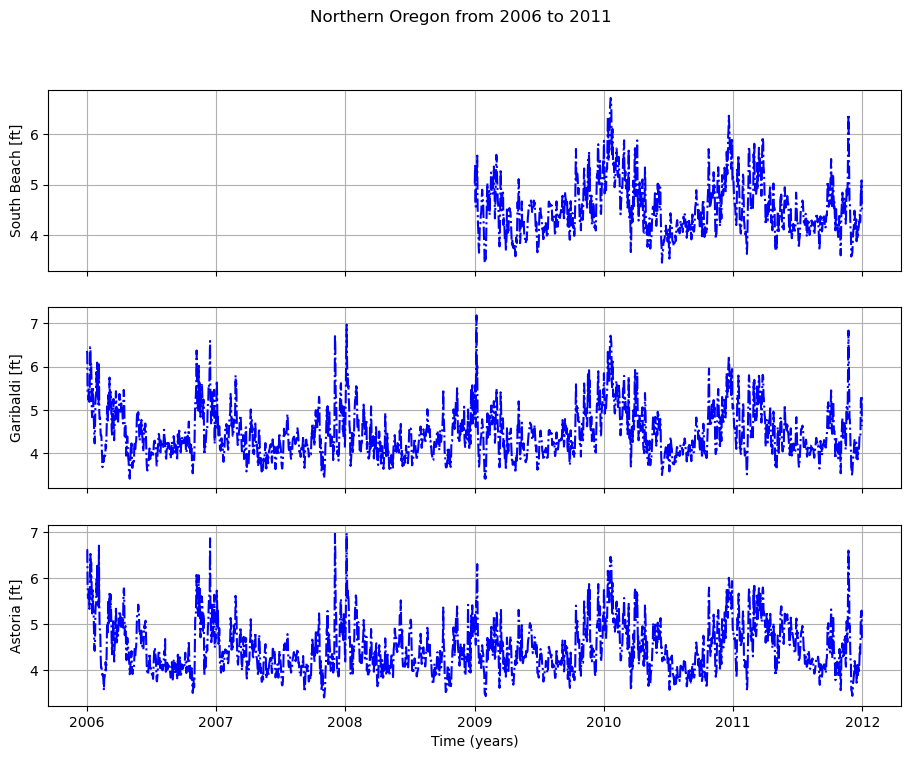

In [366]:
#Northern Oregon (2006-2011)
fig,ax=plt.subplots(3,1,figsize=(11,8),sharex=True)
fig.suptitle('Northern Oregon from 2006 to 2011')
ax[0].plot(South_Beach_2006_2011_resampled.index, South_Beach_2006_2011_resampled['Verified (ft)'], '-.b');ax[0].grid(True);ax[0].set_ylabel('South Beach [ft]')
ax[1].plot(Garibaldi_2006_2011_resampled.index, Garibaldi_2006_2011_resampled['Verified (ft)'], '-.b');ax[1].grid(True);ax[1].set_ylabel('Garibaldi [ft]')
ax[2].plot(Astoria_2006_2011_resampled.index, Astoria_2006_2011_resampled['Verified (ft)'], '-.b');ax[2].grid(True);ax[2].set_ylabel('Astoria [ft]')
ax[2].set_xlabel('Time (years)')
plt.show()

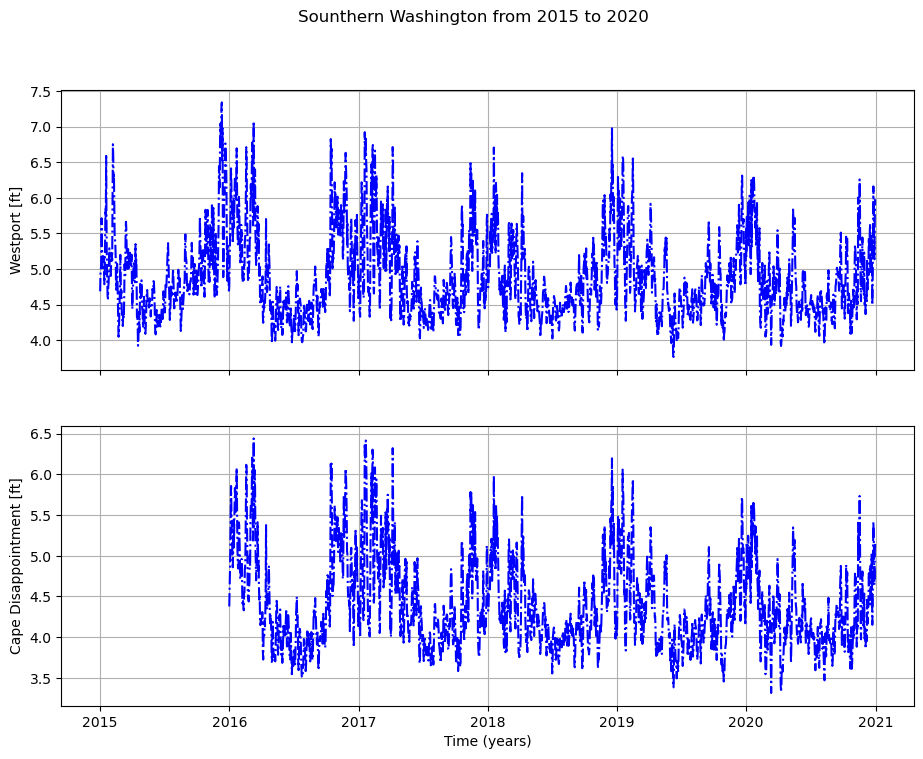

In [367]:
#Southern Washington (2015-2020)
fig,ax=plt.subplots(2,1,figsize=(11,8),sharex=True)
fig.suptitle('Sounthern Washington from 2015 to 2020')
ax[0].plot(Westport_2015_2020_resampled.index, Westport_2015_2020_resampled['Verified (ft)'], '-.b');ax[0].grid(True);ax[0].set_ylabel('Westport [ft]') #;ax[1].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[1].plot(Cape_Disappointment_2015_2020_resampled.index, Cape_Disappointment_2015_2020_resampled['Verified (ft)'], '-.b');ax[1].grid(True);ax[1].set_ylabel('Cape Disappointment [ft]') #;ax[2].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[1].set_xlabel('Time (years)')
plt.show()

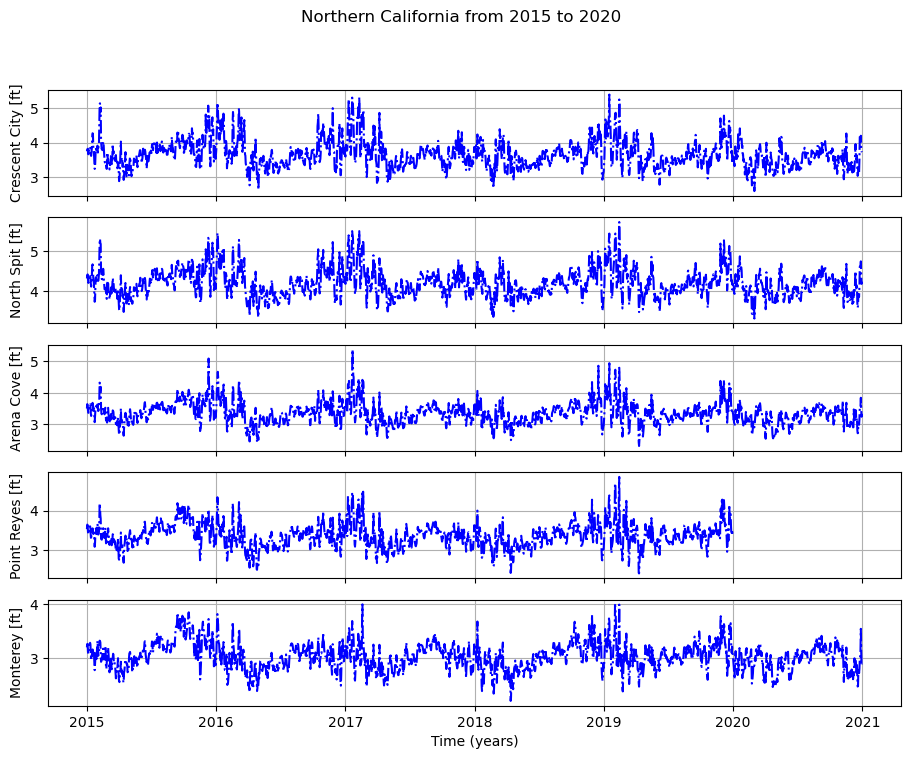

In [368]:
#Northern California (2015-2020)
fig,ax=plt.subplots(5,1,figsize=(11,8),sharex=True)
fig.suptitle('Northern California from 2015 to 2020')
ax[0].plot(Crescent_City_2015_2020_resampled.index, Crescent_City_2015_2020_resampled['Verified (ft)'], '-.b');ax[0].grid(True);ax[0].set_ylabel('Crescent City [ft]') #;ax[0].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[1].plot(North_Spit_2015_2020_resampled.index, North_Spit_2015_2020_resampled['Verified (ft)'], '-.b');ax[1].grid(True);ax[1].set_ylabel('North Spit [ft]') #;ax[1].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[2].plot(Arena_Cove_2015_2020_resampled.index, Arena_Cove_2015_2020_resampled['Verified (ft)'], '-.b');ax[2].grid(True);ax[2].set_ylabel('Arena Cove [ft]') #;ax[2].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[3].plot(Point_Reyes_2015_2020_resampled.index, Point_Reyes_2015_2020_resampled['Verified (ft)'], '-.b');ax[3].grid(True);ax[3].set_ylabel('Point Reyes [ft]') #;ax[3].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[4].plot(Monterey_2015_2020_resampled.index, Monterey_2015_2020_resampled['Verified (ft)'], '-.b');ax[4].grid(True);ax[4].set_ylabel('Monterey [ft]') #;ax[4].set_xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-12-31'))
ax[4].set_xlabel('Time (years)')
plt.show()

## GPS and NOAA

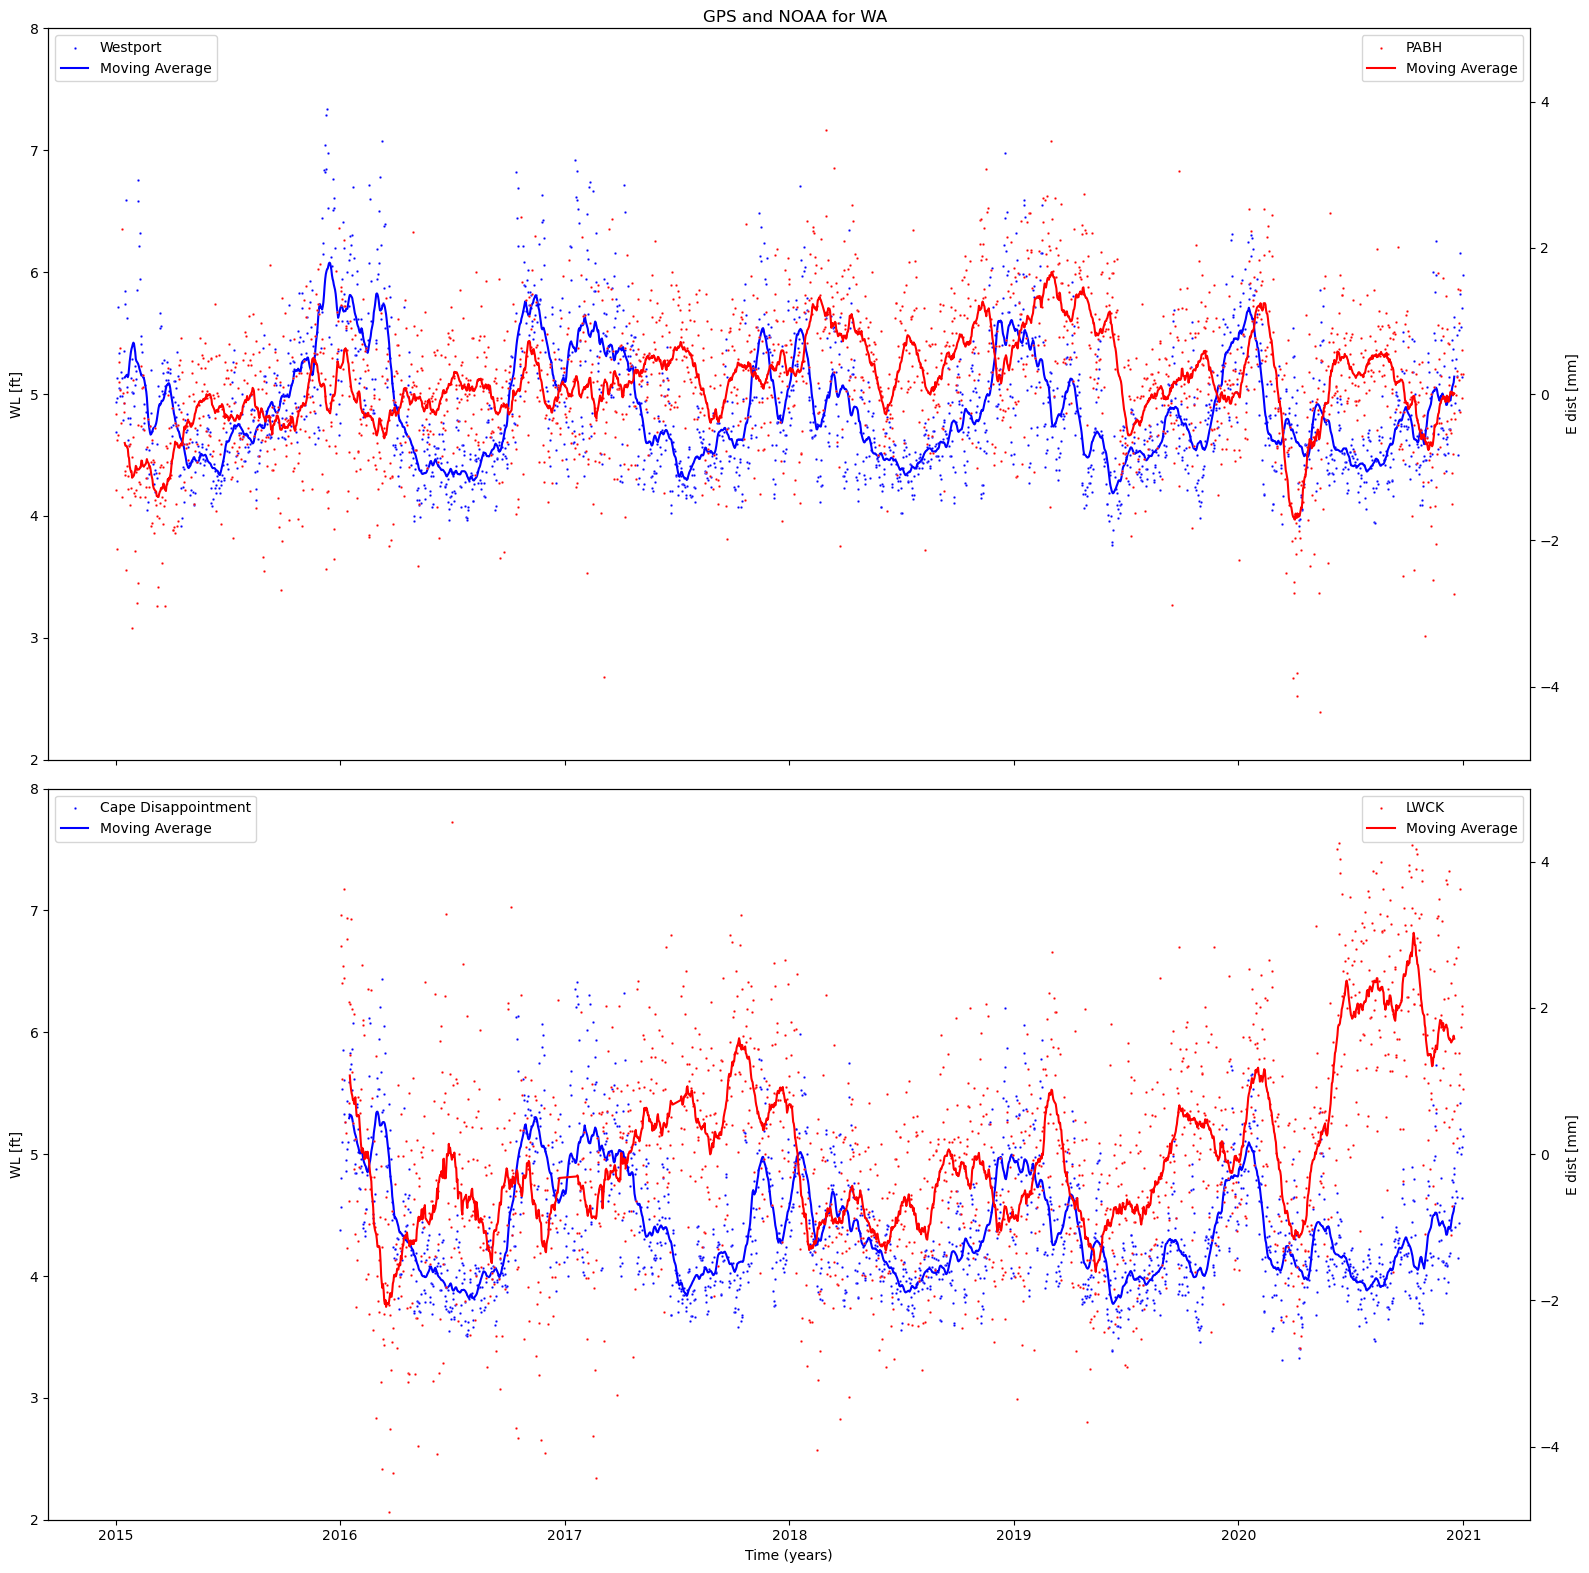

In [369]:
windows = 30

#WA

fig, axes = plt.subplots(2, 1, figsize=(16,16), sharex=True)

fig.suptitle('GPS and NOAA for WA')

#Plot Westport and PABH
#Westport
Westport_2015_2020_resampled_ma = Westport_2015_2020_resampled['Verified (ft)'].rolling(window=windows, center=True).mean()
sns.scatterplot(data=Westport_2015_2020_resampled, x=Westport_2015_2020_resampled.index, y='Verified (ft)', ax=axes[0], color='blue', label='Westport',s=3)
sns.lineplot(data=Westport_2015_2020_resampled_ma, ax=axes[0], color='blue', label='Moving Average', linestyle='-')
axes[0].set_ylabel('WL [ft]', color='black')
axes[0].set_xlabel('Time (years)')
axes[0].legend(loc='upper left')
axes[0].set_ylim(2, 8)  
#PABH
PABH_e_filtered_ma = PABH_e_filtered['RESIDUALS'].rolling(window=windows, center=True).mean()
ax2 = axes[0].twinx()
sns.scatterplot(data=PABH_e_filtered, x=PABH_e_filtered.index, y='RESIDUALS', ax=ax2, color='red', label='PABH',s=3)
sns.lineplot(data=PABH_e_filtered_ma, ax=ax2, color='red', label='Moving Average', linestyle='-')
ax2.set_ylabel('E dist [mm]', color='black')
ax2.legend(loc='upper right')
ax2.set_ylim(-5, 5) 

#Plot Cape Disappointment and LWCK
#Cape Disappointment
Cape_Disappointment_2015_2020_resampled_ma = Cape_Disappointment_2015_2020_resampled['Verified (ft)'].rolling(window=windows, center=True).mean()
sns.scatterplot(data=Cape_Disappointment_2015_2020_resampled, x=Cape_Disappointment_2015_2020_resampled.index, y='Verified (ft)', ax=axes[1], color='blue', label='Cape Disappointment', s=3)
sns.lineplot(data=Cape_Disappointment_2015_2020_resampled_ma, ax=axes[1], color='blue', label='Moving Average', linestyle='-')
axes[1].set_ylabel('WL [ft]', color='black')
axes[1].set_xlabel('Time (years)')
axes[1].legend(loc='upper left')
axes[1].set_ylim(2, 8)  

#LWCK
LWCK_e_filtered_ma = LWCK_e_filtered['RESIDUALS'].rolling(window=windows, center=True).mean()
ax3 = axes[1].twinx()
sns.scatterplot(data=LWCK_e_filtered, x=LWCK_e_filtered.index, y='RESIDUALS', ax=ax3, color='red', label='LWCK',s=3)
sns.lineplot(data=LWCK_e_filtered_ma, ax=ax3, color='red', label='Moving Average', linestyle='-')
ax3.set_ylabel('E dist [mm]', color='black')
ax3.legend(loc='upper right')
ax3.set_ylim(-5, 5)

plt.tight_layout()
plt.show()


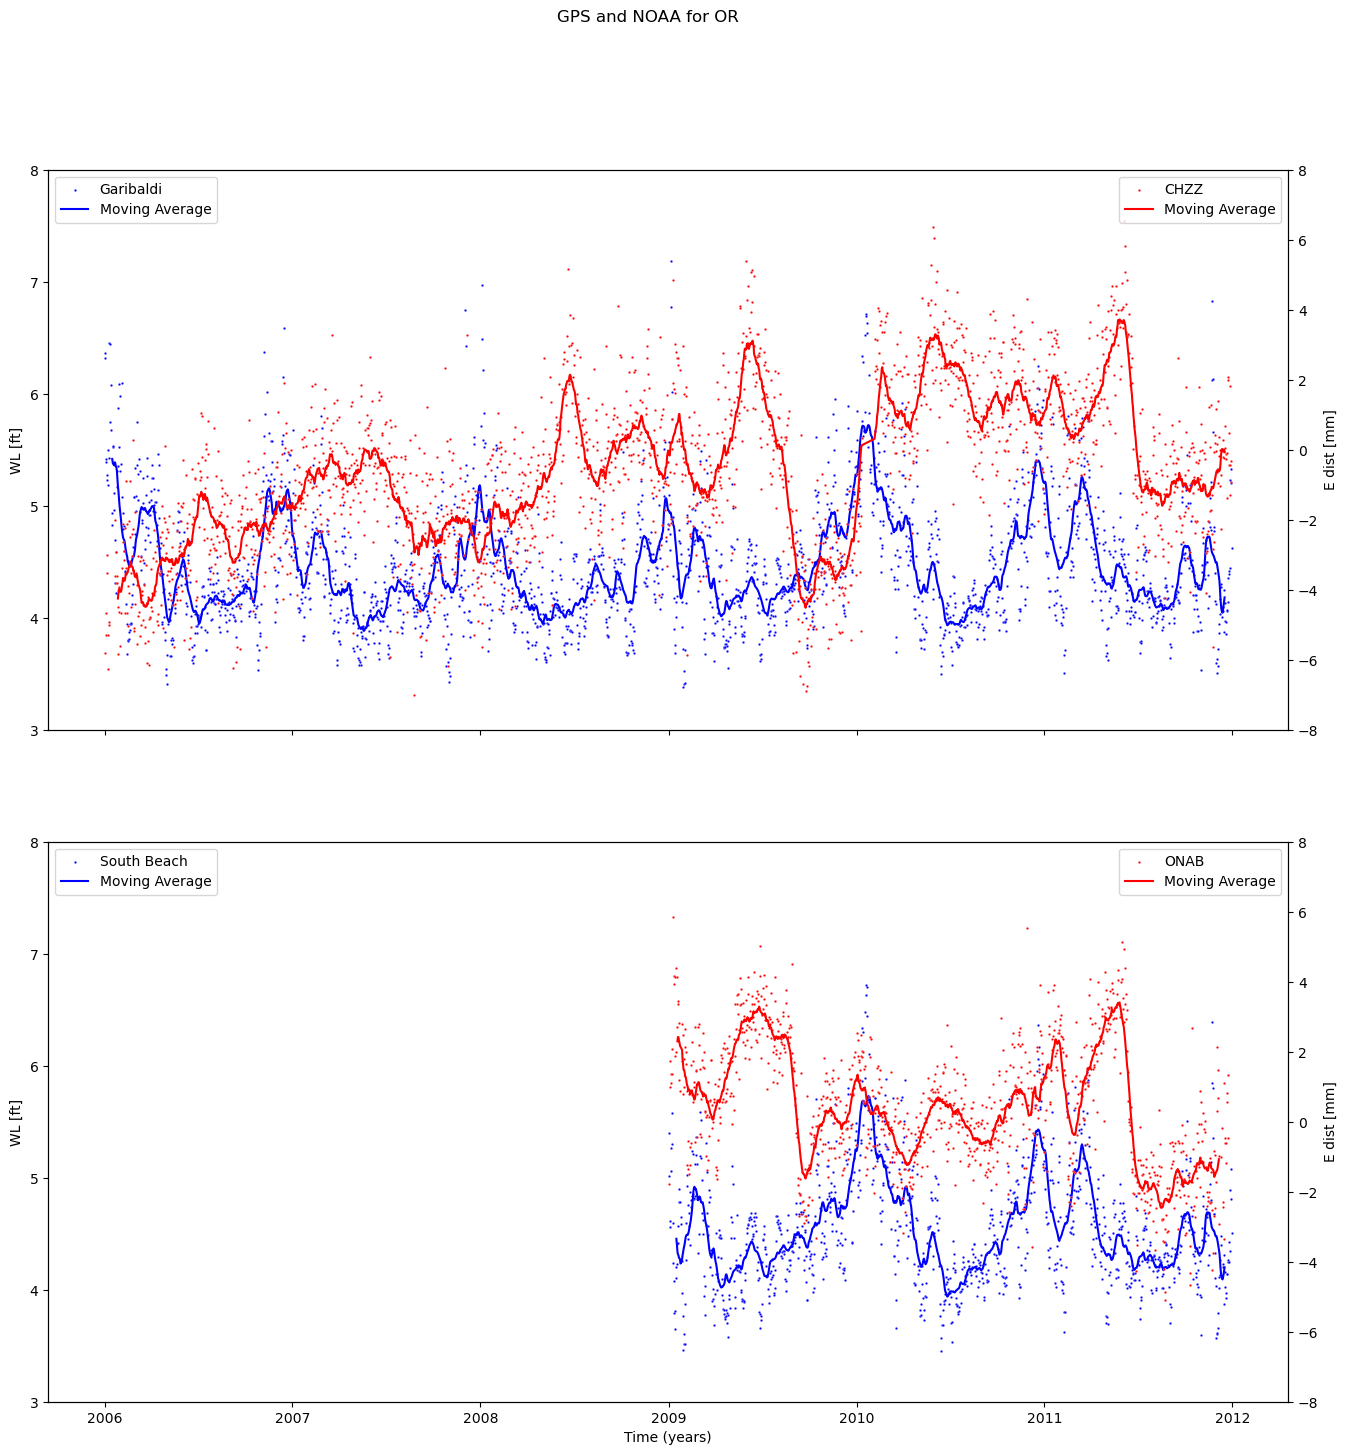

In [370]:
fig, axes = plt.subplots(2, 1, figsize=(16, 16), sharex=True)

fig.suptitle('GPS and NOAA for OR')

#Plot Garibaldi and CHZZ
#Garibaldi
Garibaldi_2006_2011_resampled_ma = Garibaldi_2006_2011_resampled['Verified (ft)'].rolling(window=windows, center=True).mean()
sns.scatterplot(data=Garibaldi_2006_2011_resampled, x=Garibaldi_2006_2011_resampled.index, y='Verified (ft)', ax=axes[0], color='blue', label='Garibaldi',s=3)
sns.lineplot(data=Garibaldi_2006_2011_resampled_ma, ax=axes[0], color='blue', label='Moving Average', linestyle='-')
axes[0].set_ylabel('WL [ft]', color='black')
axes[0].set_xlabel('Time (years)')
axes[0].legend(loc='upper left')
axes[0].set_ylim(3, 8)  
#CHZZ
CHZZ_e_filtered_ma = CHZZ_e_filtered['RESIDUALS'].rolling(window=windows, center=True).mean()
ax2 = axes[0].twinx()
sns.scatterplot(data=CHZZ_e_filtered, x=CHZZ_e_filtered.index, y='RESIDUALS', ax=ax2, color='red', label='CHZZ',s=3)
sns.lineplot(data=CHZZ_e_filtered_ma, ax=ax2, color='red', label='Moving Average', linestyle='-')
ax2.set_ylabel('E dist [mm]', color='black')
ax2.legend(loc='upper right')
ax2.set_ylim(-8, 8) 

#Plot South Beach and ONAB
#South Beach
South_Beach_2006_2011_resampled_ma = South_Beach_2006_2011_resampled['Verified (ft)'].rolling(window=windows, center=True).mean()
sns.scatterplot(data=South_Beach_2006_2011_resampled, x=South_Beach_2006_2011_resampled.index, y='Verified (ft)', ax=axes[1], color='blue', label='South Beach',s=3)
sns.lineplot(data=South_Beach_2006_2011_resampled_ma, ax=axes[1], color='blue', label='Moving Average', linestyle='-')
axes[1].set_ylabel('WL [ft]', color='black')
axes[1].set_xlabel('Time (years)')
axes[1].legend(loc='upper left')
axes[1].set_ylim(3, 8)  

#ONAB
ONAB_e_filtered_ma = ONAB_e_filtered['RESIDUALS'].rolling(window=windows, center=True).mean()
ax3 = axes[1].twinx()
sns.scatterplot(data=ONAB_e_filtered, x=ONAB_e_filtered.index, y='RESIDUALS', ax=ax3, color='red', label='ONAB',s=3)
sns.lineplot(data=ONAB_e_filtered_ma, ax=ax3, color='red', label='Moving Average', linestyle='-')
ax3.set_ylabel('E dist [mm]', color='black')
ax3.legend(loc='upper right')
ax3.set_ylim(-8, 8) 

plt.show()

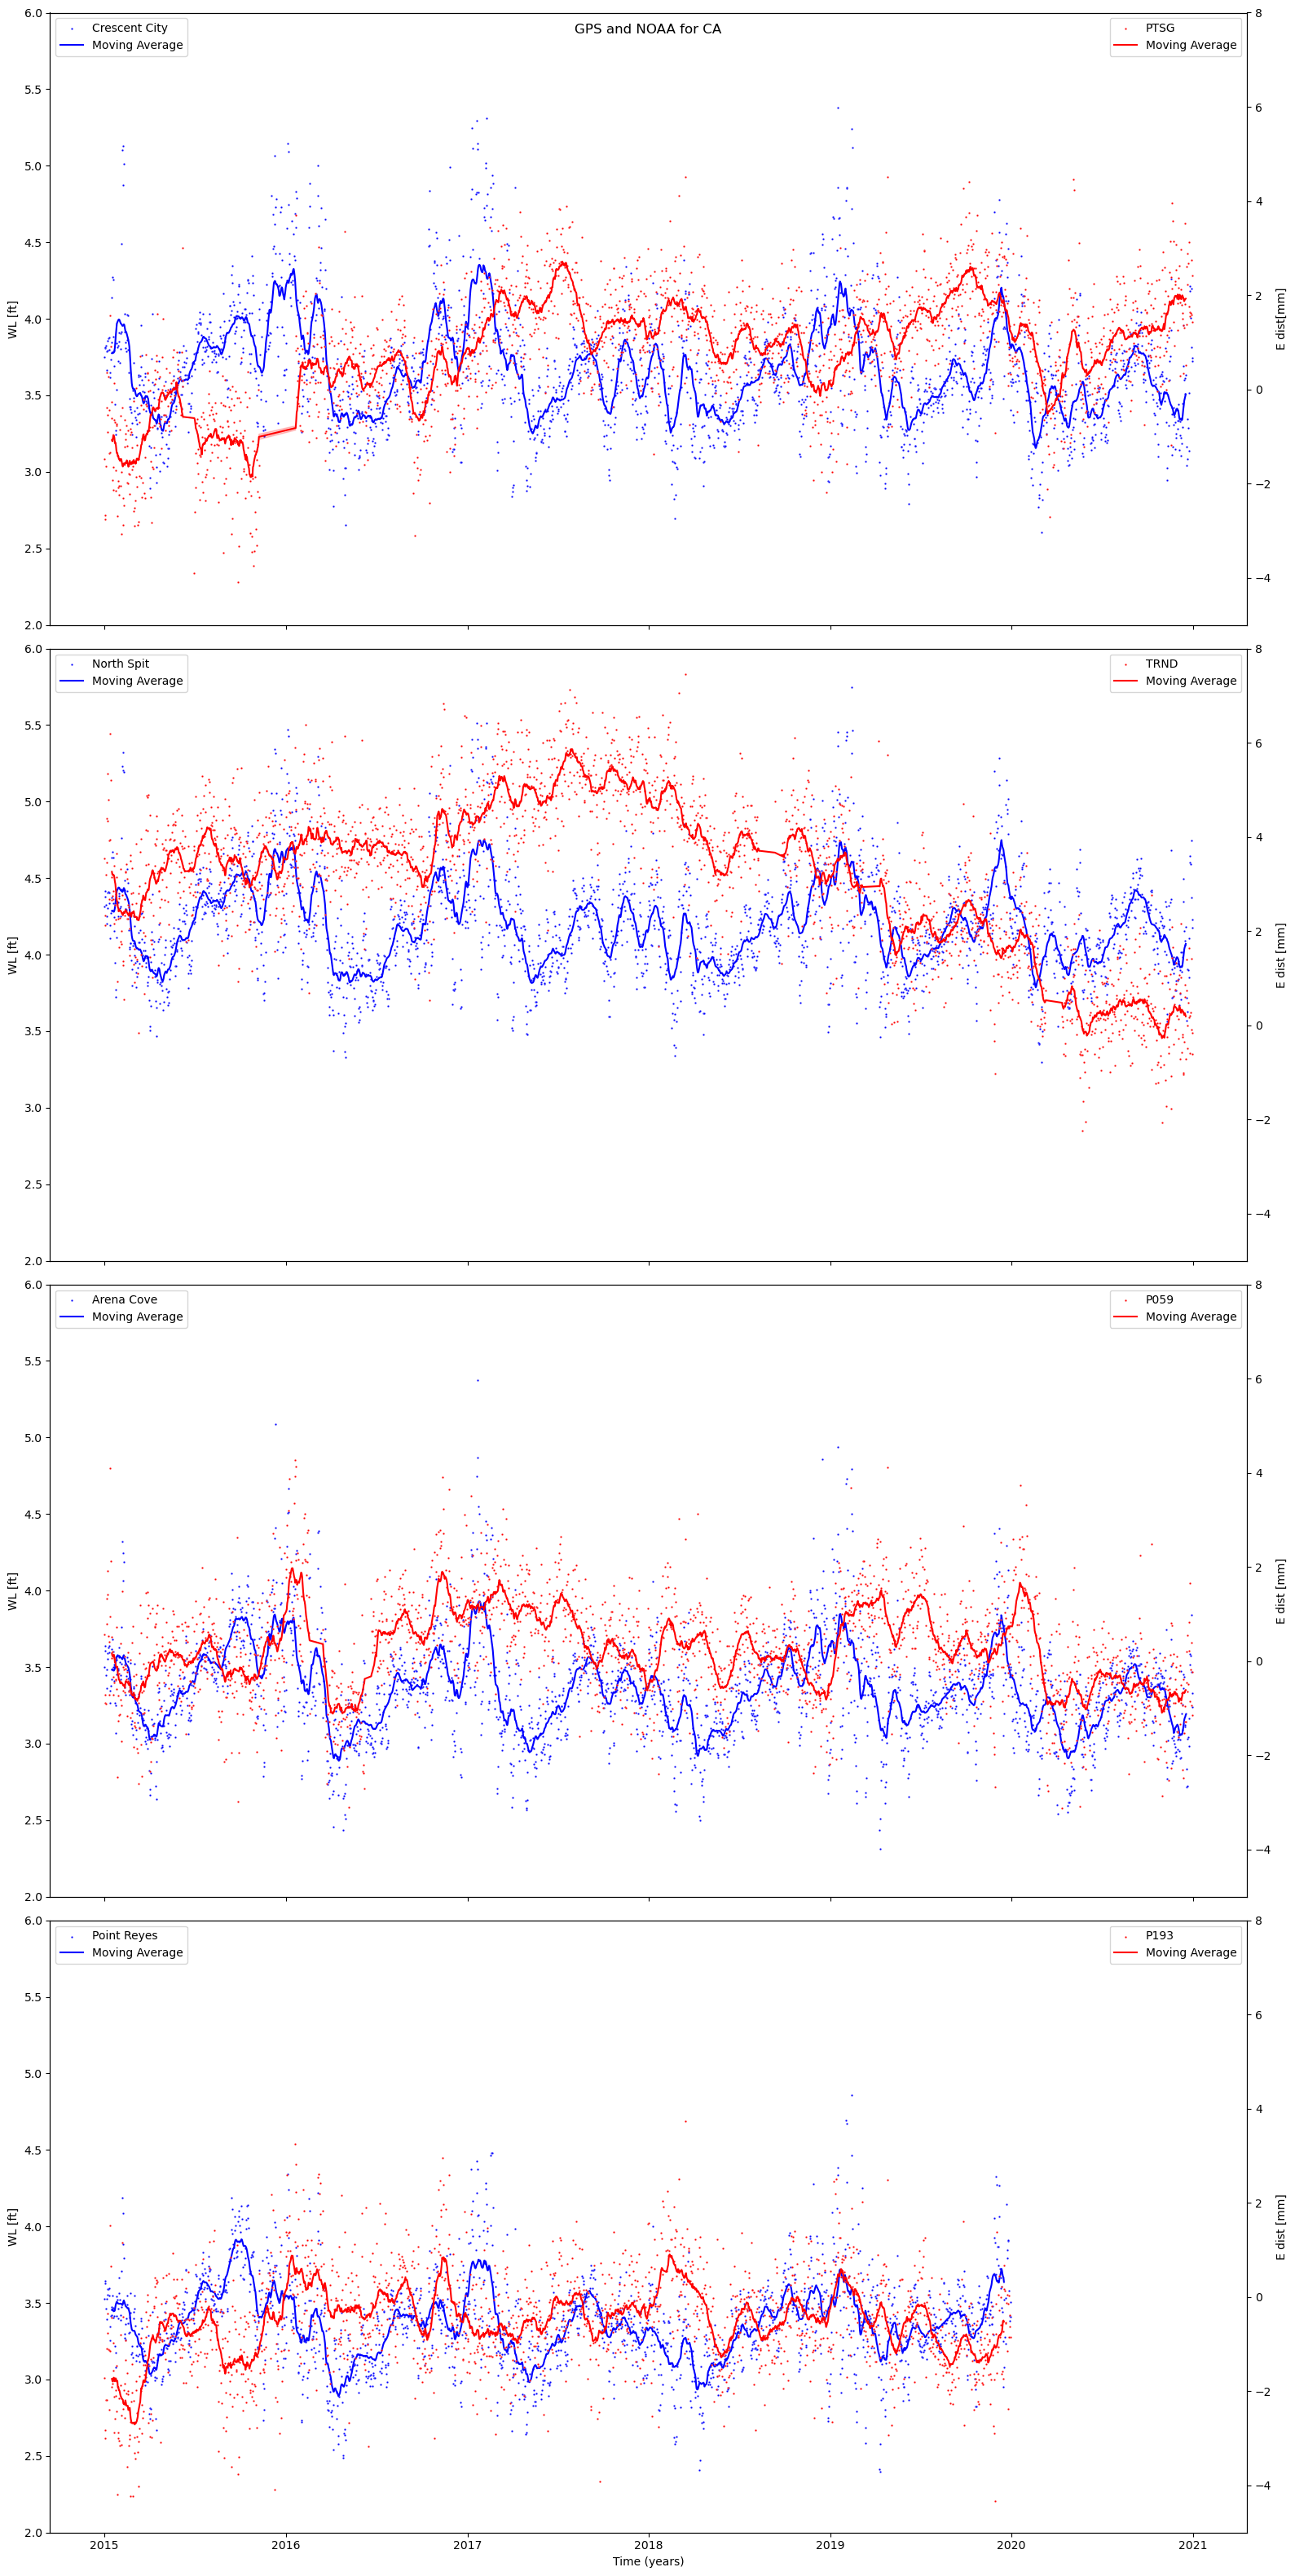

In [371]:
fig, axes = plt.subplots(4, 1, figsize=(16, 32), sharex=True)

fig.suptitle('GPS and NOAA for CA')

#Plot Crescent City and PTSG
#Crescent City
Crescent_City_2015_2020_resampled_ma = Crescent_City_2015_2020_resampled['Verified (ft)'].rolling(window=windows, center=True).mean()
sns.scatterplot(Crescent_City_2015_2020_resampled, x=Crescent_City_2015_2020_resampled.index, y='Verified (ft)', ax=axes[0], color='blue', label='Crescent City',s=3)
sns.lineplot(Crescent_City_2015_2020_resampled_ma, ax=axes[0], color='blue', label='Moving Average', linestyle='-')
axes[0].set_ylabel('WL [ft]', color='black')
axes[0].set_xlabel('Time (years)')
axes[0].legend(loc='upper left')
axes[0].set_ylim(2, 6)  

#PTSG
PTSG_e_filtered_ma = PTSG_e_filtered['RESIDUALS'].rolling(window=windows, center=True).mean()
ax2 = axes[0].twinx()
sns.scatterplot(PTSG_e_filtered, x=PTSG_e_filtered.index, y='RESIDUALS', ax=ax2, color='red', label='PTSG',s=3)
sns.lineplot(PTSG_e_filtered_ma, ax=ax2, color='red', label='Moving Average', linestyle='-')
ax2.set_ylabel('E dist[mm]', color='black')
ax2.legend(loc='upper right')
ax2.set_ylim(-5, 8) 

#Plot North Spit and TRND
#North Spit
North_Spit_2015_2020_resampled_ma = North_Spit_2015_2020_resampled['Verified (ft)'].rolling(window=windows, center=True).mean()
sns.scatterplot(North_Spit_2015_2020_resampled, x=North_Spit_2015_2020_resampled.index, y='Verified (ft)', ax=axes[1], color='blue', label='North Spit',s=3)
sns.lineplot(North_Spit_2015_2020_resampled_ma, ax=axes[1], color='blue', label='Moving Average', linestyle='-')
axes[1].set_ylabel('WL [ft]', color='black')
axes[1].set_xlabel('Time (years)')
axes[1].legend(loc='upper left')
axes[1].set_ylim(2, 6)  

#TRND
TRND_e_filtered_ma = TRND_e_filtered['RESIDUALS'].rolling(window=windows, center=True).mean()
ax3 = axes[1].twinx()
sns.scatterplot(TRND_e_filtered, x=TRND_e_filtered.index, y='RESIDUALS', ax=ax3, color='red', label='TRND',s=3)
sns.lineplot(TRND_e_filtered_ma, ax=ax3, color='red', label='Moving Average', linestyle='-')
ax3.set_ylabel('E dist [mm]', color='black')
ax3.legend(loc='upper right')
ax3.set_ylim(-5, 8) 

# Plot Arena Cove and P059
# Arena Cove
Arena_Cove_2015_2020_resampled_ma = Arena_Cove_2015_2020_resampled['Verified (ft)'].rolling(window=windows, center=True).mean()
sns.scatterplot(Arena_Cove_2015_2020_resampled, x=Arena_Cove_2015_2020_resampled.index, y='Verified (ft)', ax=axes[2], color='blue', label='Arena Cove',s=3)
sns.lineplot(Arena_Cove_2015_2020_resampled_ma, ax=axes[2], color='blue', label='Moving Average', linestyle='-')
axes[2].set_ylabel('WL [ft]', color='black')
axes[2].set_xlabel('Time (years)')
axes[2].set_ylim(2, 6)  
axes[2].legend(loc='upper left')

# P059
P059_e_filtered_ma = P059_e_filtered['RESIDUALS'].rolling(window=windows, center=True).mean()
ax4 = axes[2].twinx()
sns.scatterplot(P059_e_filtered, x=P059_e_filtered.index, y='RESIDUALS', ax=ax4, color='red', label='P059',s=3)
sns.lineplot(P059_e_filtered_ma, ax=ax4, color='red', label='Moving Average', linestyle='-')
ax4.set_ylabel('E dist [mm]', color='black')
ax4.legend(loc='upper right')
ax4.set_ylim(-5, 8) 

# Plot Point Reyes and P193
# Point Reyes
Point_Reyes_2015_2020_resampled_ma = Point_Reyes_2015_2020_resampled['Verified (ft)'].rolling(window=windows, center=True).mean()
sns.scatterplot(Point_Reyes_2015_2020_resampled, x=Point_Reyes_2015_2020_resampled.index, y='Verified (ft)', ax=axes[3], color='blue', label='Point Reyes',s=3)
sns.lineplot(Point_Reyes_2015_2020_resampled_ma, ax=axes[3], color='blue', label='Moving Average', linestyle='-')
axes[3].set_ylabel('WL [ft]', color='black')
axes[3].set_xlabel('Time (years)')
axes[3].set_ylim(2, 6)  
axes[3].legend(loc='upper left')

# P193
P193_e_filtered_ma = P193_e_filtered['RESIDUALS'].rolling(window=windows, center=True).mean()
ax5 = axes[3].twinx()
sns.scatterplot(P193_e_filtered, x=P193_e_filtered.index, y='RESIDUALS', ax=ax5, color='red', label='P193',s=3)
sns.lineplot(P193_e_filtered_ma, ax=ax5, color='red', label='Moving Average', linestyle='-')
ax5.set_ylabel('E dist [mm]', color='black')
ax5.legend(loc='upper right')
ax5.set_ylim(-5, 8) 

plt.tight_layout()
plt.show()


## Correlation Analysis

In [372]:
def add_missing_dates_and_drop_duplicates(df, start_date, end_date, df_type):
    # Create a reference date range
    reference_dates = pd.date_range(start=start_date, end=end_date)
    
    # Convert the 'Datetime' column to datetime objects
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Find missing dates
    missing_dates = reference_dates[~reference_dates.isin(df['Datetime'])]
    
    # Determine the column name based on the dataframe type
    column_name = 'RESIDUALS' if df_type == 'gps' else 'Verified (ft)'
    
    # Add missing dates with NaN values
    missing_df = pd.DataFrame({'Datetime': missing_dates, column_name: [float('NaN')] * len(missing_dates)})
    
    # Concatenate the missing data with the original DataFrame
    df = pd.concat([df, missing_df], ignore_index=True)
    
    # Sort the DataFrame by 'Datetime'
    df.sort_values('Datetime', inplace=True)
    
    # Drop duplicates 
    df.drop_duplicates(subset='Datetime', keep='first', inplace=True)
    
    # Reset the index
    df.reset_index(drop=True, inplace=True)
    
    return df


In [373]:
def add_missing_dates_and_drop_duplicates(df, start_date, end_date, df_type):
    # Create a reference date range
    reference_dates = pd.date_range(start=start_date, end=end_date)
    
    # Convert the 'Datetime' column to datetime objects
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Find missing dates
    missing_dates = reference_dates[~reference_dates.isin(df['Datetime'])]
    
    # Determine the column name based on the dataframe type
    column_name = 'RESIDUALS' if df_type == 'gps' else 'Verified (ft)'
    
    # Iterate over missing dates and fill with average of nearest existing values
    for date in missing_dates:
        # Find nearest existing dates
        nearest_dates = df['Datetime'].iloc[(df['Datetime'] - date).abs().argsort()[:2]]
        nearest_values = df.loc[df['Datetime'].isin(nearest_dates), column_name]
        
        # Fill missing value with average of nearest existing values
        missing_value = nearest_values.mean()
        df = df.append({'Datetime': date, column_name: missing_value}, ignore_index=True)
    
    # Sort the DataFrame by 'Datetime'
    df.sort_values('Datetime', inplace=True)
    
    # Drop duplicates 
    df.drop_duplicates(subset='Datetime', keep='first', inplace=True)
    
    # Reset the index
    df.reset_index(drop=True, inplace=True)
    
    return df


In [374]:
def add_missing_dates_and_drop_duplicates(df, start_date, end_date, df_type):
    # Create a reference date range
    reference_dates = pd.date_range(start=start_date, end=end_date)
    
    # Convert the 'Datetime' column to datetime objects
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Set 'Datetime' as the index
    df.set_index('Datetime', inplace=True)
    
    # Find missing dates
    missing_dates = reference_dates[~reference_dates.isin(df.index)]
    
    # Determine the column name based on the dataframe type
    column_name = 'RESIDUALS' if df_type == 'gps' else 'Verified (ft)'
    
    # Concatenate the missing data with the original DataFrame
    missing_df = pd.DataFrame(index=missing_dates, columns=[column_name])
    df = pd.concat([df, missing_df])
    
    # Sort the DataFrame by index
    df.sort_index(inplace=True)
    
    # Interpolate missing values
    df[column_name] = df[column_name].interpolate(method='time')
    
    # Drop duplicates 
    df.drop_duplicates(subset='Datetime', keep='first', inplace=True)
    
    # Reset the index
    df.reset_index(drop=True, inplace=True)
    
    return df



In [375]:
def add_missing_dates_and_drop_duplicates(df, start_date, end_date, df_type):
    # Create a reference date range
    reference_dates = pd.date_range(start=start_date, end=end_date)
    
    # # If 'Datetime' is already the index, reset it temporarily
    # if isinstance(df.index, pd.DatetimeIndex):
    #     df.reset_index(inplace=True)
    
    # Convert the 'Datetime' column to datetime objects
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Set 'Datetime' as the index
    df.set_index('Datetime', inplace=True)
    
    # Find missing dates
    missing_dates = reference_dates[~reference_dates.isin(df.index)]
    
    # Determine the column name based on the dataframe type
    column_name = 'RESIDUALS' if df_type == 'gps' else 'Verified (ft)'
    
    # Concatenate the missing data with the original DataFrame
    missing_df = pd.DataFrame(index=missing_dates, columns=[column_name])
    df = pd.concat([df, missing_df])
    
    # Sort the DataFrame by index
    df.sort_index(inplace=True)
    
    # Interpolate missing values
    df[column_name] = df[column_name].interpolate(method='time')
    
    # Drop duplicates 
    df.drop_duplicates(subset='Datetime', keep='first', inplace=True)
    
    # Reset the index
    df.reset_index(drop=True, inplace=True)
    
    return df


In [376]:
def get_series_from_dataframe(df, df_type):
    # Determine the column name based on the dataframe type
    column_name = 'RESIDUALS' if df_type == 'gps' else 'Verified (ft)'
    
    # Extract the series from the specified column
    series = df[column_name].squeeze()
    
    return series

In [377]:
def create_array_from_series(series_name, window_size):
    series = globals()[series_name]
    array = [series.iloc[i:i+window_size].values for i in range(len(series)-window_size+1)]
    return array

In [378]:
def calculate_correlation(wl_list, gps_list):
    corr_list = []
    for arr1, arr2 in zip(wl_list, gps_list):
        crr = np.corrcoef(arr1, arr2)[0,1]
        corr_list.append(crr)
    return corr_list

In [379]:
def prep(df, start_date, end_date, df_type):
    """
    Prepare the DataFrame by adding missing dates, interpolating missing values, and dropping duplicates.
    
    Args:
    df (DataFrame): The DataFrame to be prepared.
    start_date (str): The start date in 'YYYY-MM-DD' format.
    end_date (str): The end date in 'YYYY-MM-DD' format.
    df_type (str): The type of DataFrame, either 'gps' or 'wl'.
    
    Returns:
    DataFrame: The prepared DataFrame.
    """
    
    # Convert 'Datetime' column to datetime objects
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Set 'Datetime' as the index
    df.set_index('Datetime', inplace=True)
    
    # Create a reference date range
    reference_dates = pd.date_range(start=start_date, end=end_date)
    
    # Find missing dates
    missing_dates = reference_dates[~reference_dates.isin(df.index)]
    
    # Determine the column name based on the dataframe type
    column_name = 'RESIDUALS' if df_type == 'gps' else 'Verified (ft)'
    
    # Create a DataFrame with missing dates
    missing_df = pd.DataFrame(index=missing_dates, columns=[column_name])
    
    # Concatenate the missing data with the original DataFrame
    df = pd.concat([df, missing_df])
    
    # Sort the DataFrame by index
    df.sort_index(inplace=True)
    
    # Interpolate missing values
    df[column_name] = df[column_name].interpolate(method='time')
    
    # Drop duplicates
    df = df[~df.index.duplicated(keep='first')]
    
    # Reset the index
    df.reset_index(drop=True, inplace=True)
    
    return df


In [447]:
def plot_corr_gps(ax, index, corr, gps, ylim1, ylim2, title):
    # Plot y1 on the left axis
    ax.plot(index[:len(corr)], corr, color='blue', label='Correlation Coefficient')
    ax.set_ylabel('Correlation Coefficient', color='blue')
    ax.set_ylim(-1, 1)  # Set y-axis limits for the left axis

    # Critical threshold 
    threshold = 0.75
    ax.axhline(y=0.75, color='blue', linestyle=':', marker='o', label='Critical Threshold')
    ax.axhline(y=-0.75, color='blue', linestyle=':', marker='o')

    # Create a twin y-axis sharing the same x-axis
    ax2 = ax.twinx()

    # Plot y2 on the right axis
    ax2.plot(index, gps, color='red', label='E displacement [mm]')
    ax2.set_ylabel('E displacement [mm]', color='red')
    ax2.set_ylim(ylim1, ylim2)  # Set y-axis limits for the right axis

    # Intervals where corr exceeds threshold values
    mask1 = np.array(corr) >= threshold
    mask2 = np.array(corr) <= -threshold
    ax.fill_between(index[:len(corr)], -1, corr, where=mask1, color='lightgreen', alpha=0.5)
    ax.fill_between(index[:len(corr)], -1, corr, where=mask2, color='lightgreen', alpha=0.5)

    # Add title
    ax.set_title(title)

    # Add legend
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show plot
    plt.tight_layout()


In [407]:
# WA
Westport_df = Westport_2015_2020_resampled_ma.reset_index()
PABH_df = PABH_e_filtered_ma.reset_index()

Cape_Disappointment_df = Cape_Disappointment_2015_2020_resampled_ma.reset_index()
LWCK_df = LWCK_e_filtered_ma.reset_index()

# OR
Garibaldi_df = Garibaldi_2006_2011_resampled_ma.reset_index()
CHZZ_df = CHZZ_e_filtered_ma.reset_index()

South_Beach_df = South_Beach_2006_2011_resampled_ma.reset_index()
ONAB_df = ONAB_e_filtered_ma.reset_index()

# CA 
Crescent_City_df = Crescent_City_2015_2020_resampled_ma.reset_index()
PTSG_df = PTSG_e_filtered_ma.reset_index()

North_Spit_df = North_Spit_2015_2020_resampled_ma.reset_index()
TRND_df = TRND_e_filtered_ma.reset_index()

Arena_Cove_df = Arena_Cove_2015_2020_resampled_ma.reset_index()
P059_df = P059_e_filtered_ma.reset_index()

Point_Reyes_df = Point_Reyes_2015_2020_resampled_ma.reset_index()
P193_df = P193_e_filtered_ma.reset_index()


#-----------------------------


# WA
Westport_df = prep(Westport_df, '2015-01-01', '2020-12-31','wl')
PABH_df = prep(PABH_df, '2015-01-01', '2020-12-31','gps')

Cape_Disappointment_df = prep(Cape_Disappointment_df, '2016-01-01', '2020-12-31','wl')
LWCK_df = prep(LWCK_df, '2016-01-01', '2020-12-31','gps')

# OR
Garibaldi_df = prep(Garibaldi_df, '2006-01-01', '2011-12-31','wl')
CHZZ_df = prep(CHZZ_df, '2006-01-01', '2011-12-31','gps')

South_Beach_df = prep(South_Beach_df, '2009-01-01', '2011-12-31','wl')
ONAB_df = prep(ONAB_df, '2009-01-01', '2011-12-31','gps')

# CA
Crescent_City_df = prep(Crescent_City_df, '2015-01-01', '2020-12-31','wl')
PTSG_df = prep(PTSG_df, '2015-01-01', '2020-12-31','gps')

North_Spit_df = prep(North_Spit_df, '2015-01-01', '2020-12-31','wl')
TRND_df = prep(TRND_df, '2015-01-01', '2020-12-31','gps')

Arena_Cove_df = prep(Arena_Cove_df, '2015-01-01', '2020-12-31','wl')
P059_df = prep(P059_df, '2015-01-01', '2020-12-31','gps')

Point_Reyes_df = prep(Point_Reyes_df, '2015-01-01', '2020-12-31','wl')
P193_df = prep(P193_df, '2015-01-01', '2019-12-31','gps')


In [408]:
# WA
Westport_series = get_series_from_dataframe(Westport_df , 'wl')
PABH_series = get_series_from_dataframe(PABH_df, 'gps')

Cape_Disappointment_series = get_series_from_dataframe(Cape_Disappointment_df, 'wl')
LWCK_series = get_series_from_dataframe(LWCK_df, 'gps')

# OR
Garibaldi_series = get_series_from_dataframe(Garibaldi_df, 'wl')
CHZZ_series = get_series_from_dataframe(CHZZ_df, 'gps')

South_Beach_series = get_series_from_dataframe(South_Beach_df, 'wl')
ONAB_series = get_series_from_dataframe(ONAB_df, 'gps')

# CA
Crescent_City_series = get_series_from_dataframe(Crescent_City_df, 'wl')
PTSG_series = get_series_from_dataframe(PTSG_df, 'gps')

North_Spit_series = get_series_from_dataframe(North_Spit_df, 'wl')
TRND_series = get_series_from_dataframe(TRND_df, 'gps')

Arena_Cove_series = get_series_from_dataframe(Arena_Cove_df, 'wl')
P059_series = get_series_from_dataframe(P059_df, 'gps')

Point_Reyes_series = get_series_from_dataframe(Point_Reyes_df, 'wl')
P193_series = get_series_from_dataframe(P193_df, 'gps')

In [409]:
window_size = 365

# WA
Westport_array = create_array_from_series("Westport_series", window_size)
PABH_array = create_array_from_series("PABH_series", window_size)

Cape_Disappointment_array = create_array_from_series("Cape_Disappointment_series", window_size)
LWCK_array = create_array_from_series("LWCK_series", window_size)

# OR
Garibaldi_array = create_array_from_series("Garibaldi_series", window_size)
CHZZ_array = create_array_from_series("CHZZ_series", window_size)

South_Beach_array = create_array_from_series("South_Beach_series", window_size)
ONAB_array = create_array_from_series("ONAB_series", window_size)

# CA
Crescent_City_array = create_array_from_series("Crescent_City_series", window_size)
PTSG_array = create_array_from_series("PTSG_series", window_size)

North_Spit_array = create_array_from_series("North_Spit_series", window_size)
TRND_array = create_array_from_series("TRND_series", window_size)

Arena_Cove_array = create_array_from_series("Arena_Cove_series", window_size)
P059_array = create_array_from_series("P059_series", window_size)

Point_Reyes_array = create_array_from_series("Point_Reyes_series", window_size)
P193_array = create_array_from_series("P193_series", window_size)

In [410]:
# WA
corr_Westport_PABH = calculate_correlation(Westport_array, PABH_array)
corr_Cape_Disappointment_LWCK = calculate_correlation(Cape_Disappointment_array, LWCK_array)

# OR 
corr_Garibaldi_CHZZ = calculate_correlation(Garibaldi_array, CHZZ_array)
corr_South_Beach_ONAB = calculate_correlation(South_Beach_array, ONAB_array)

# CA
corr_Crescent_City_PTSG = calculate_correlation(Crescent_City_array, PTSG_array)
corr_North_Spit_TRND = calculate_correlation(North_Spit_array, TRND_array)
corr_Arena_Cove_P059 = calculate_correlation(Arena_Cove_array, P059_array)
corr_Point_Reyes_P193 = calculate_correlation(Point_Reyes_array, P193_array)

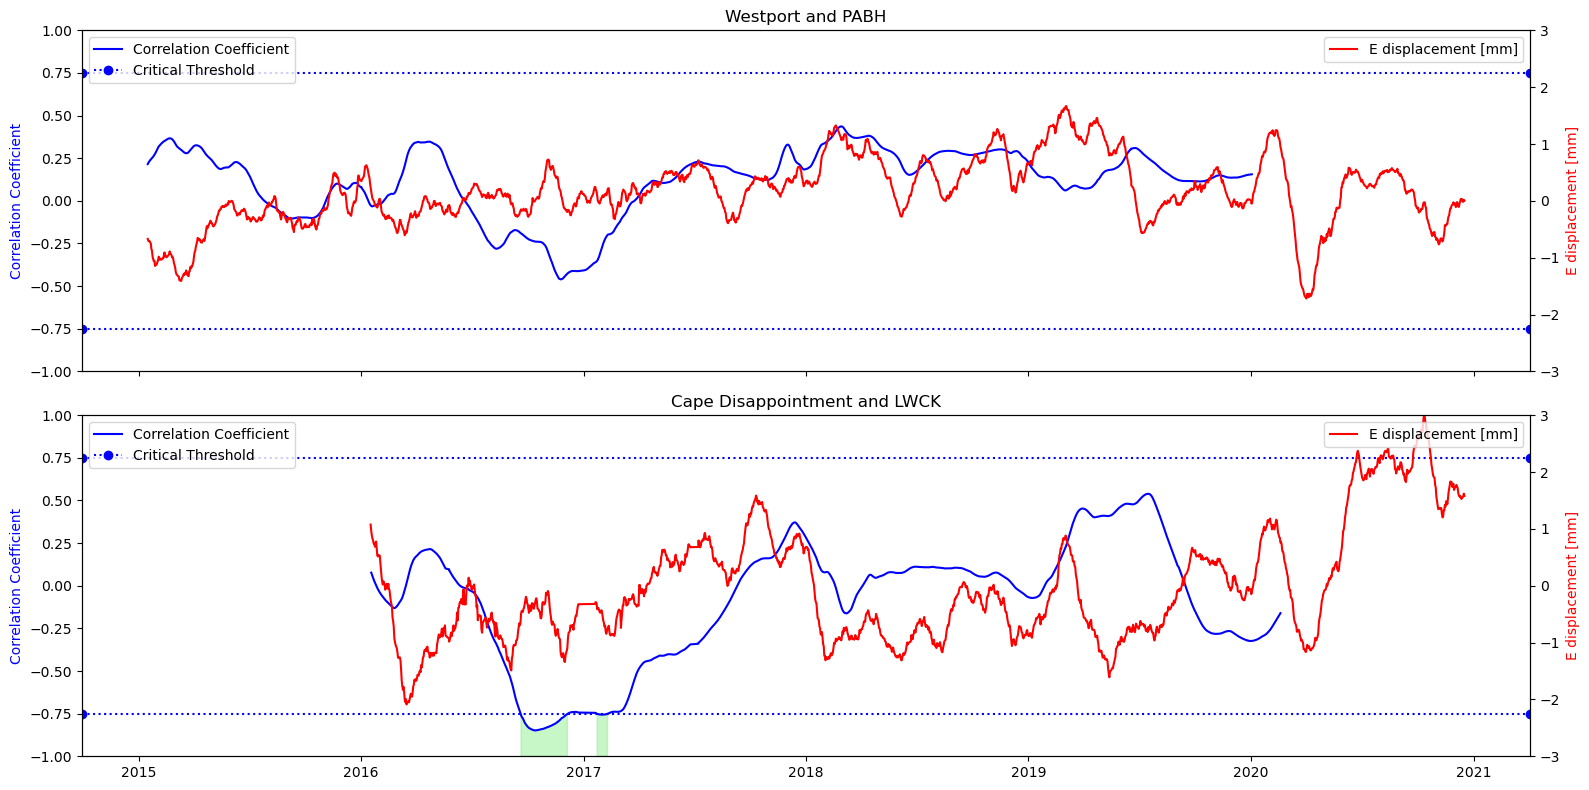

In [456]:
# WA
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex = True)
plot_corr_gps(axes[0], PABH_e_filtered.index, corr_Westport_PABH, PABH_e_filtered_ma, -3, 3, 'Westport and PABH')
plot_corr_gps(axes[1], LWCK_e_filtered.index, corr_Cape_Disappointment_LWCK, LWCK_e_filtered_ma, -3, 3, 'Cape Disappointment and LWCK')
plt.xticks(rotation = 45)
plt.savefig('Corr_gps_WA.jpeg')
plt.show()

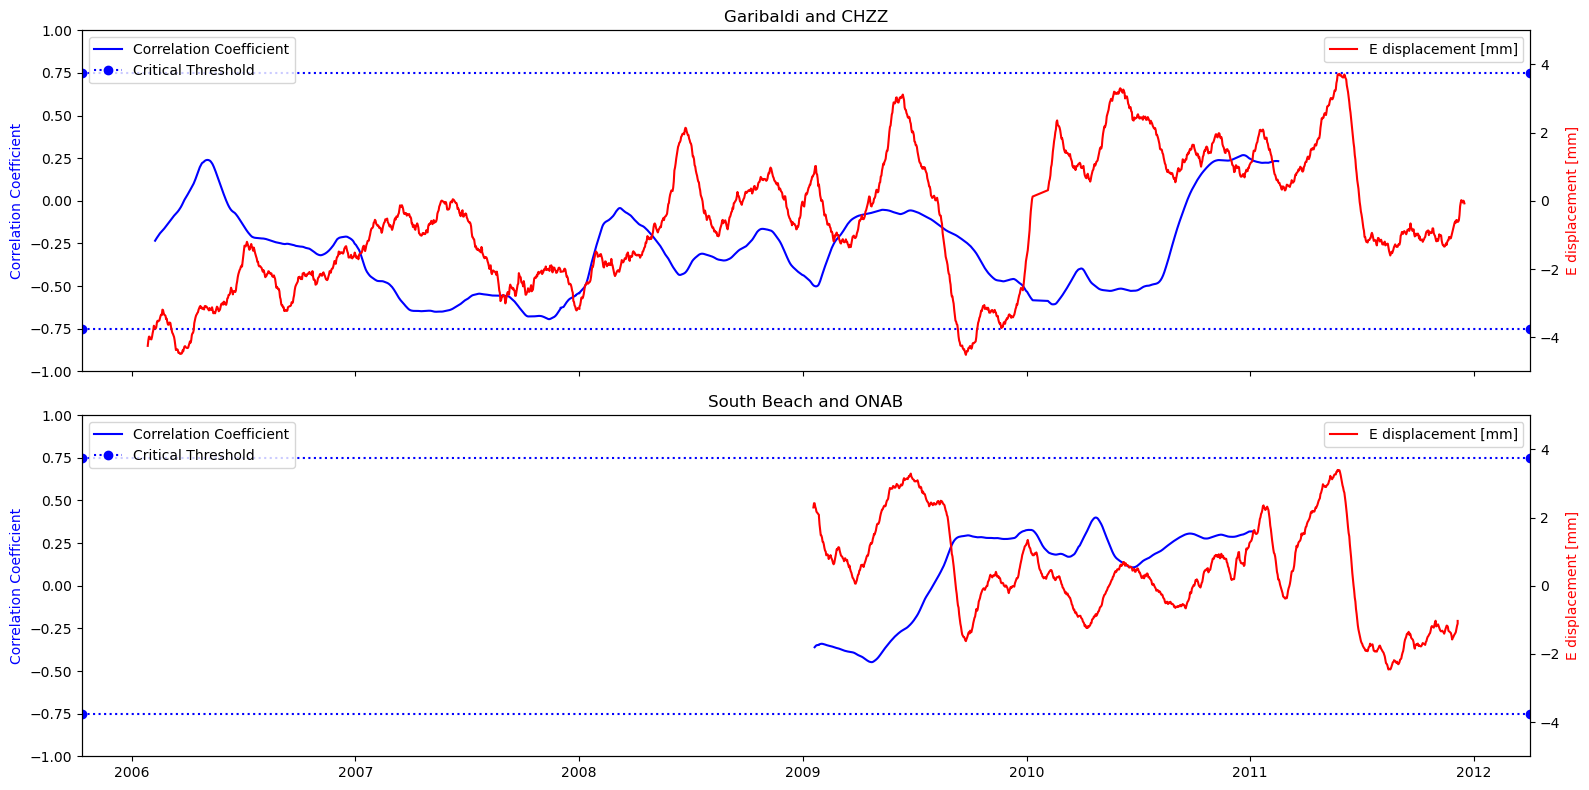

In [457]:
# OR
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex = True)
plot_corr_gps(axes[0], CHZZ_e_filtered.index, corr_Garibaldi_CHZZ, CHZZ_e_filtered_ma, -5, 5, 'Garibaldi and CHZZ')
plot_corr_gps(axes[1], ONAB_e_filtered.index, corr_South_Beach_ONAB, ONAB_e_filtered_ma, -5, 5, 'South Beach and ONAB')
plt.xticks(rotation = 45)
plt.savefig('Corr_gps_OR.jpeg')
plt.show()

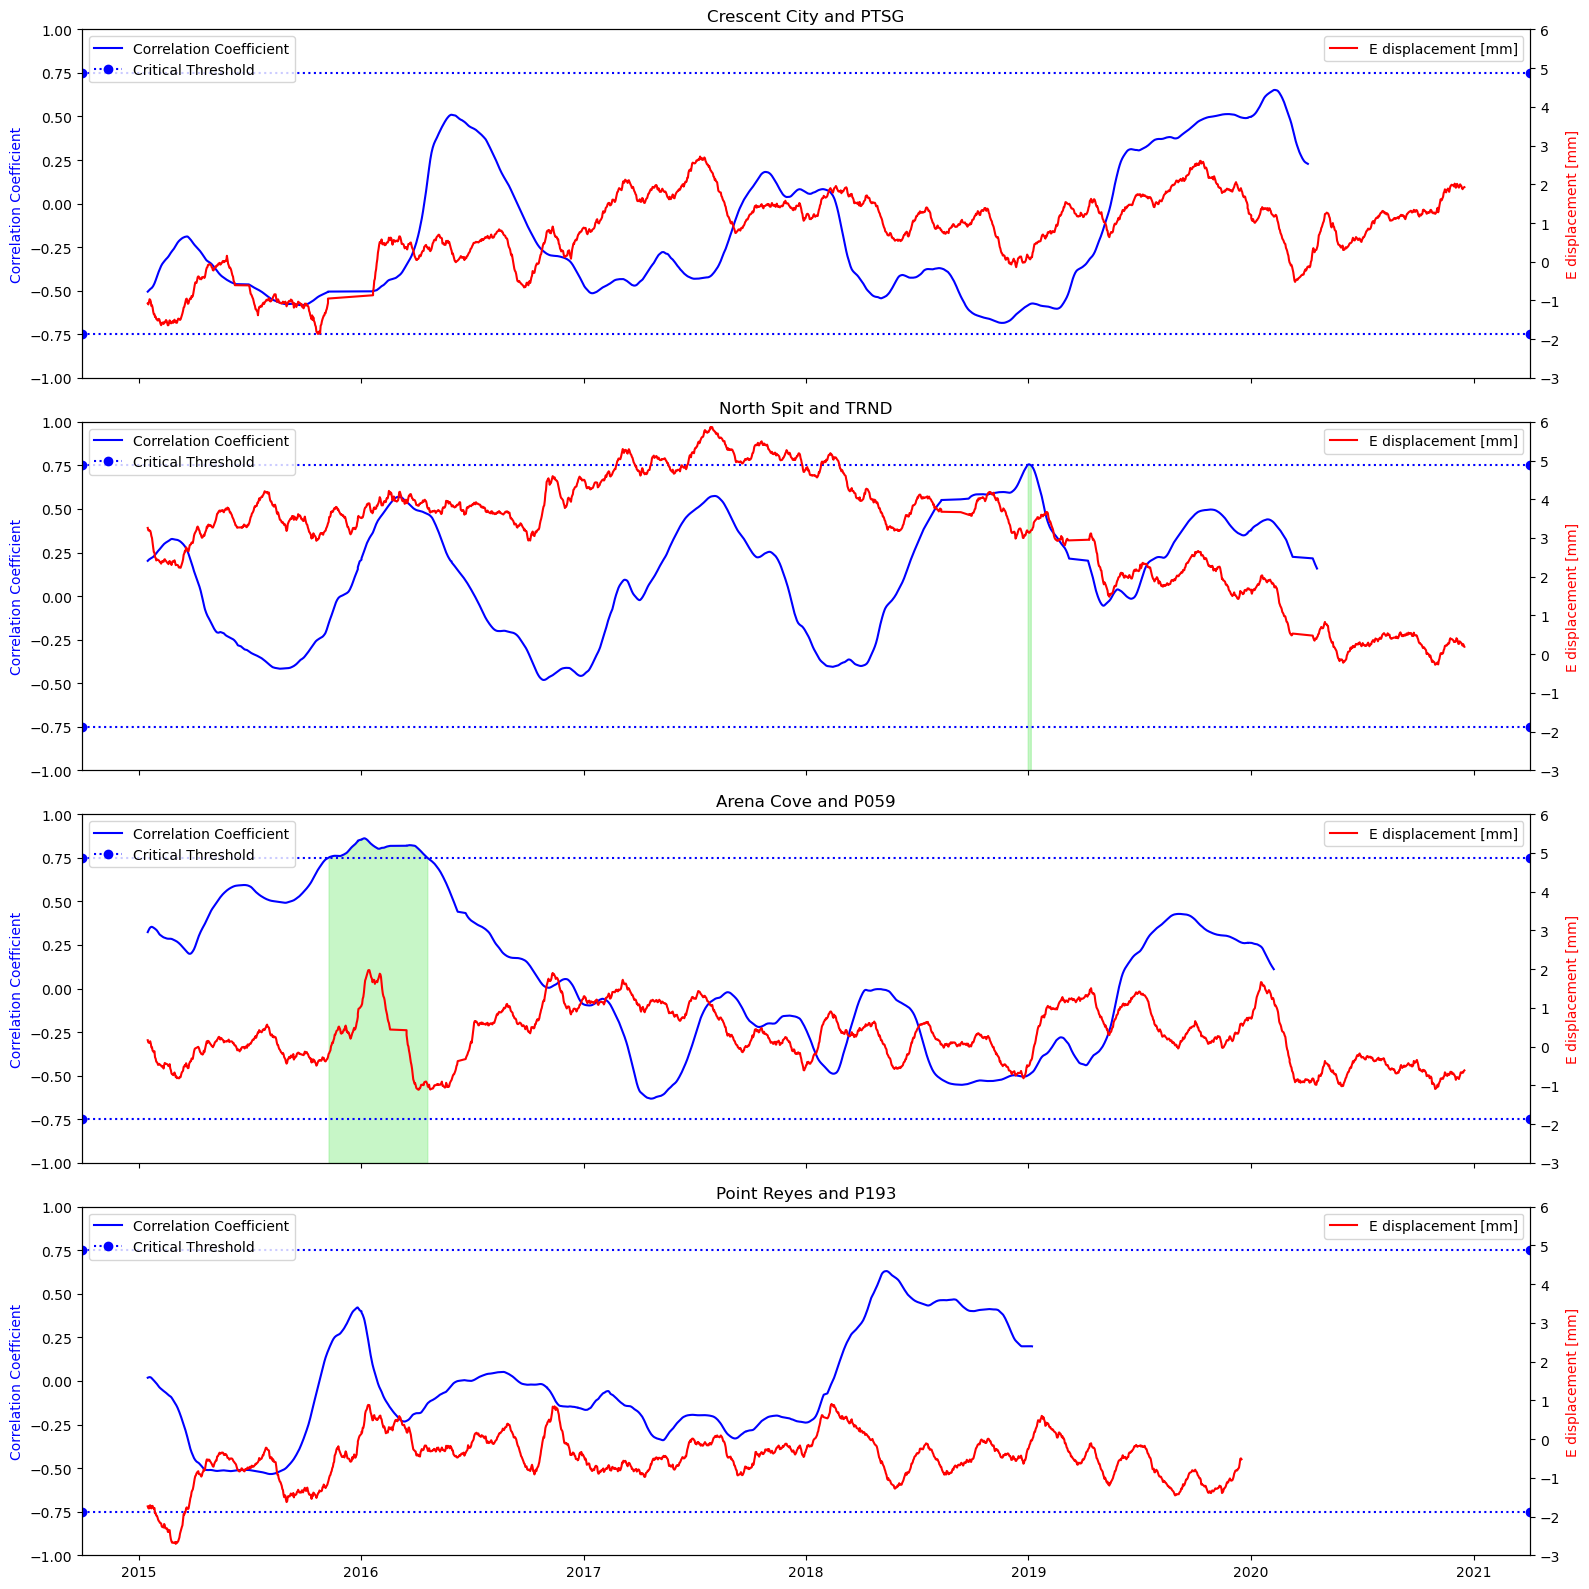

In [458]:
# CA
fig, axes = plt.subplots(4, 1, figsize=(16, 16), sharex = True)
plot_corr_gps(axes[0], PTSG_e_filtered.index, corr_Crescent_City_PTSG, PTSG_e_filtered_ma, -3, 6, 'Crescent City and PTSG')
plot_corr_gps(axes[1], TRND_e_filtered.index, corr_North_Spit_TRND, TRND_e_filtered_ma, -3, 6, 'North Spit and TRND')
plot_corr_gps(axes[2], P059_e_filtered.index, corr_Arena_Cove_P059, P059_e_filtered_ma, -3, 6, 'Arena Cove and P059')
plot_corr_gps(axes[3], P193_e_filtered.index, corr_Point_Reyes_P193, P193_e_filtered_ma, -3, 6, 'Point Reyes and P193')
plt.xticks(rotation = 45)
plt.savefig('Corr_gps_CA.jpeg')
plt.show()